In [3]:
! pip install geopandas

# Importing Python Libraries

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import plotly.express as px
import geopandas as gpd
from shapely.geometry import Point,Polygon
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from shapely import wkt
import warnings
warnings.filterwarnings(action='ignore')
%matplotlib inline

# Data load in the frame

In [19]:
import pandas as pd  # Import the Pandas library

# Now you can read your CSV file
df = pd.read_csv(r"C:\\Users\\Asus\\Downloads\\AB_NYC_2019.csv", encoding="latin1")


# Data set size

In [20]:
df.shape

(48895, 16)

In [21]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [22]:
df.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


# Remove Unwanted Columns

In [23]:
df.drop('id',axis=1,inplace=True)

# Shape of DataFrame

In [24]:
df.shape

(48895, 15)

# Datatypes of Each Column

In [25]:
# Casting the Columns into their respective Data types
df['host_id']=df['host_id'].astype('object')
df['last_review']=pd.to_datetime(df['last_review'])

In [26]:
#Rename columns 
df.dtypes.reset_index().rename(columns={'index':'Column',0:'Datatype'})

,Column,Datatype
0,name,object
1,host_id,object
2,host_name,object
3,neighbourhood_group,object
4,neighbourhood,object
5,latitude,float64
6,longitude,float64
7,room_type,object
8,price,int64
9,minimum_nights,int64


# Statistical Information

Statistical data sets are collection of data maintained in an organized form. The basis of any statistical analysis has to start with the collection of data, which is then analyzed using statistical tools.

# Getting statistical Information

In [27]:
columns=['price','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']

df[columns].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [28]:
#From statistical Anlaysis,price can't be zero so we remove those rows
dfair=df.loc[df['price']!=0]

# Cleaning Data by Removal of Null values

# Data visualization 

<Axes: >

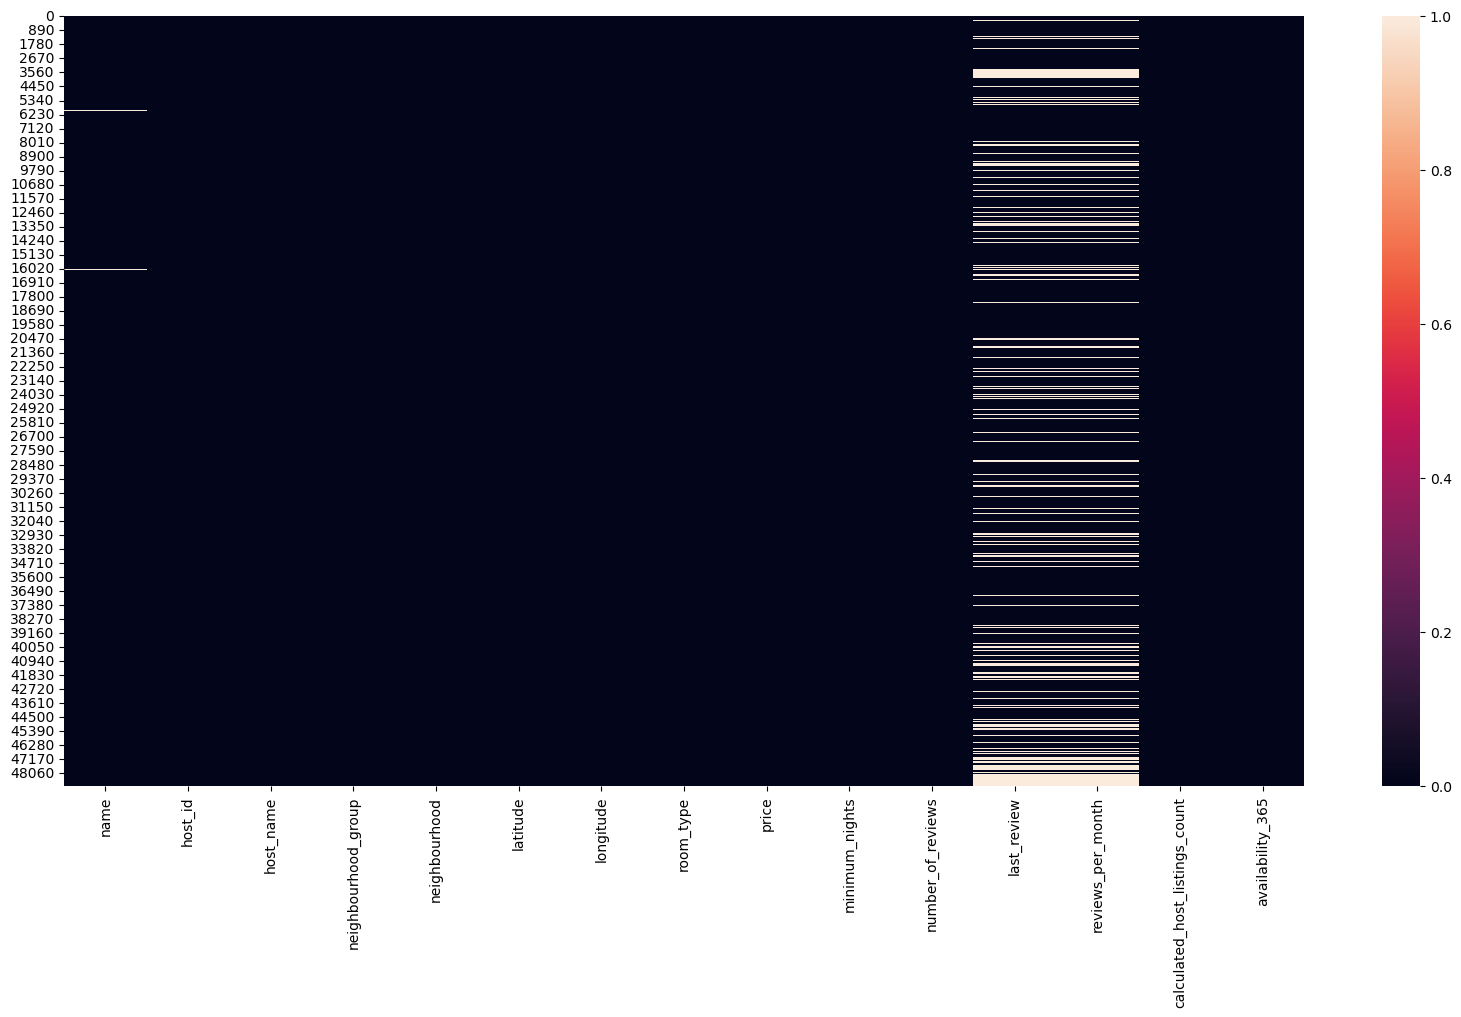

In [30]:
#Visualization of Null values using Heatmap
import matplotlib.pyplot as plt  # Import Matplotlib
import seaborn as sns
plt.figure(figsize=(20,10))
sns.heatmap(df.isnull())

In [32]:
import numpy as np
#Removing Null values
df=df.copy()
#Removing host_name rows
dfclean=df.loc[~df['host_name'].isnull()]
#Replacing name column null values by 'Missing' Labels
dfclean['name'].replace({np.nan:'Missing'},inplace=True)
#Mode Imputation Techniques used for Last review column
dfclean['reviews_per_month'].fillna(dfclean['reviews_per_month'].median(),inplace=True)
#Median Imputation Techniques used for reviews_per_month column
dfclean['last_review'].fillna(dfclean['last_review'].mode().values[0],inplace=True)

C:\Users\Asus\AppData\Local\Temp\ipykernel_15304\3923517027.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Asus\AppData\Local\Temp\ipykernel_15304\3923517027.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Asus\AppData\Local\Temp\ipykernel_15304\3923517027.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [33]:
#Count of Null values after Imputation
dfclean.isnull().sum().reset_index().rename(columns={'index':'Column',0:'Count'})

,Column,Count
0,name,0
1,host_id,0
2,host_name,0
3,neighbourhood_group,0
4,neighbourhood,0
5,latitude,0
6,longitude,0
7,room_type,0
8,price,0
9,minimum_nights,0


# Univariate Analysis

Univariate analysis in python refers to the analysis of a single variable or feature in a dataset. It involves examining the distribution, summary statistics, and visual representation of that variable to gain insights and understand its characteristics.

In [34]:
#Getting numeric columns
numerics = ['int32', 'int64', 'float64']
numer_col=list(dfclean.select_dtypes(include=numerics).columns)
#We don't include Latitude and Longitude because they are geographical data
numer_col=[i for i in numer_col if i not in ['latitude','longitude']]

C:\Users\Asus\AppData\Local\Temp\ipykernel_15304\2075728306.py:13: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\Asus\AppData\Local\Temp\ipykernel_15304\2075728306.py:13: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\Asus\AppData\Local\Temp\ipykernel_15304\2075728306.py:13: UserWarning:



`distplot` is

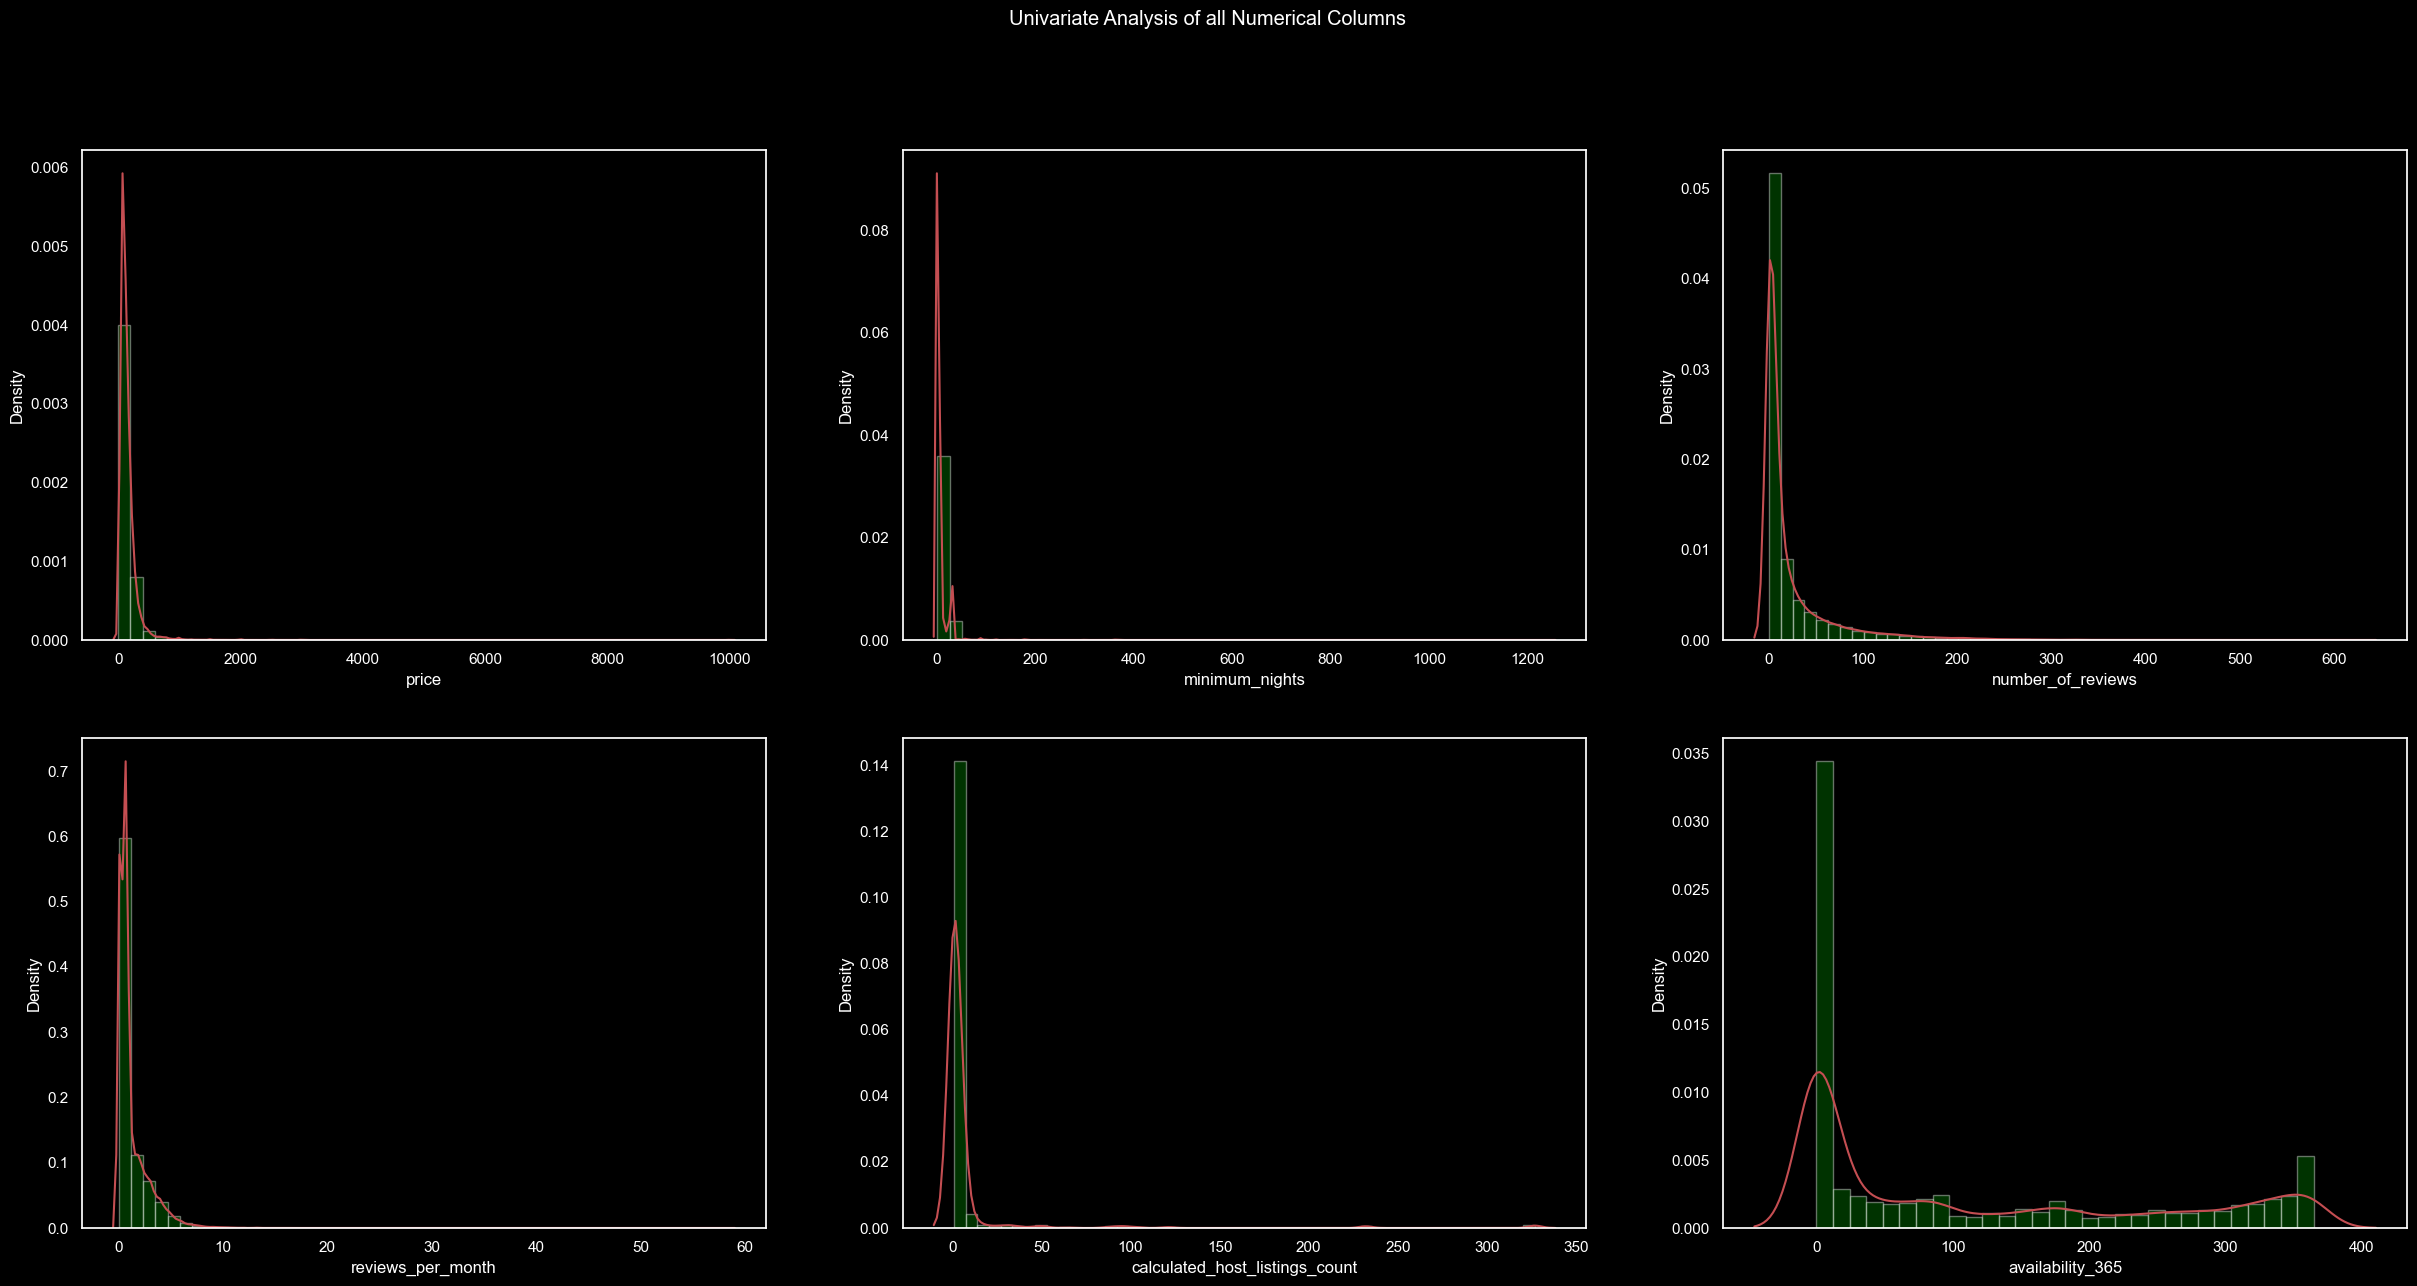

In [35]:
#setting the background style
sns.set_theme('notebook', style='dark')
plt.style.use("dark_background")
#creating subplots 
fig, ax =plt.subplots(2,3,figsize=(30,14))
#setting a title of enitre graph
fig.suptitle('Univariate Analysis of all Numerical Columns')
ind,ind1=0,0
axis=0
for i in numer_col:
  if ind<3:
    #plotting graphs for first axis(row)
    sns.distplot(dfclean[i],kde=True,color='green',kde_kws={'color':'r'},ax=ax[axis][ind])
    ind=ind+1
  elif ind>=3:
    axis=1
    #plotting graphs for second axis(row)
    sns.distplot(dfclean[i],kde=True,color='green',kde_kws={'color':'r'},ax=ax[axis][ind1])
    ind1=ind1+1
#show figure
fig.show()

# Bivariate Analysis 

 Bivariate analysis in Python can be performed using various libraries such as Pandas, NumPy, and Matplotlib. You can start by importing these libraries and loading your dataset into a Pandas DataFrame. Then, you can use functions like scatter plots, line plots, or bar plots to visualize the relationship between two variables. Additionally, you can calculate correlation coefficients or perform hypothesis tests to quantify the strength and significance of the relationship.

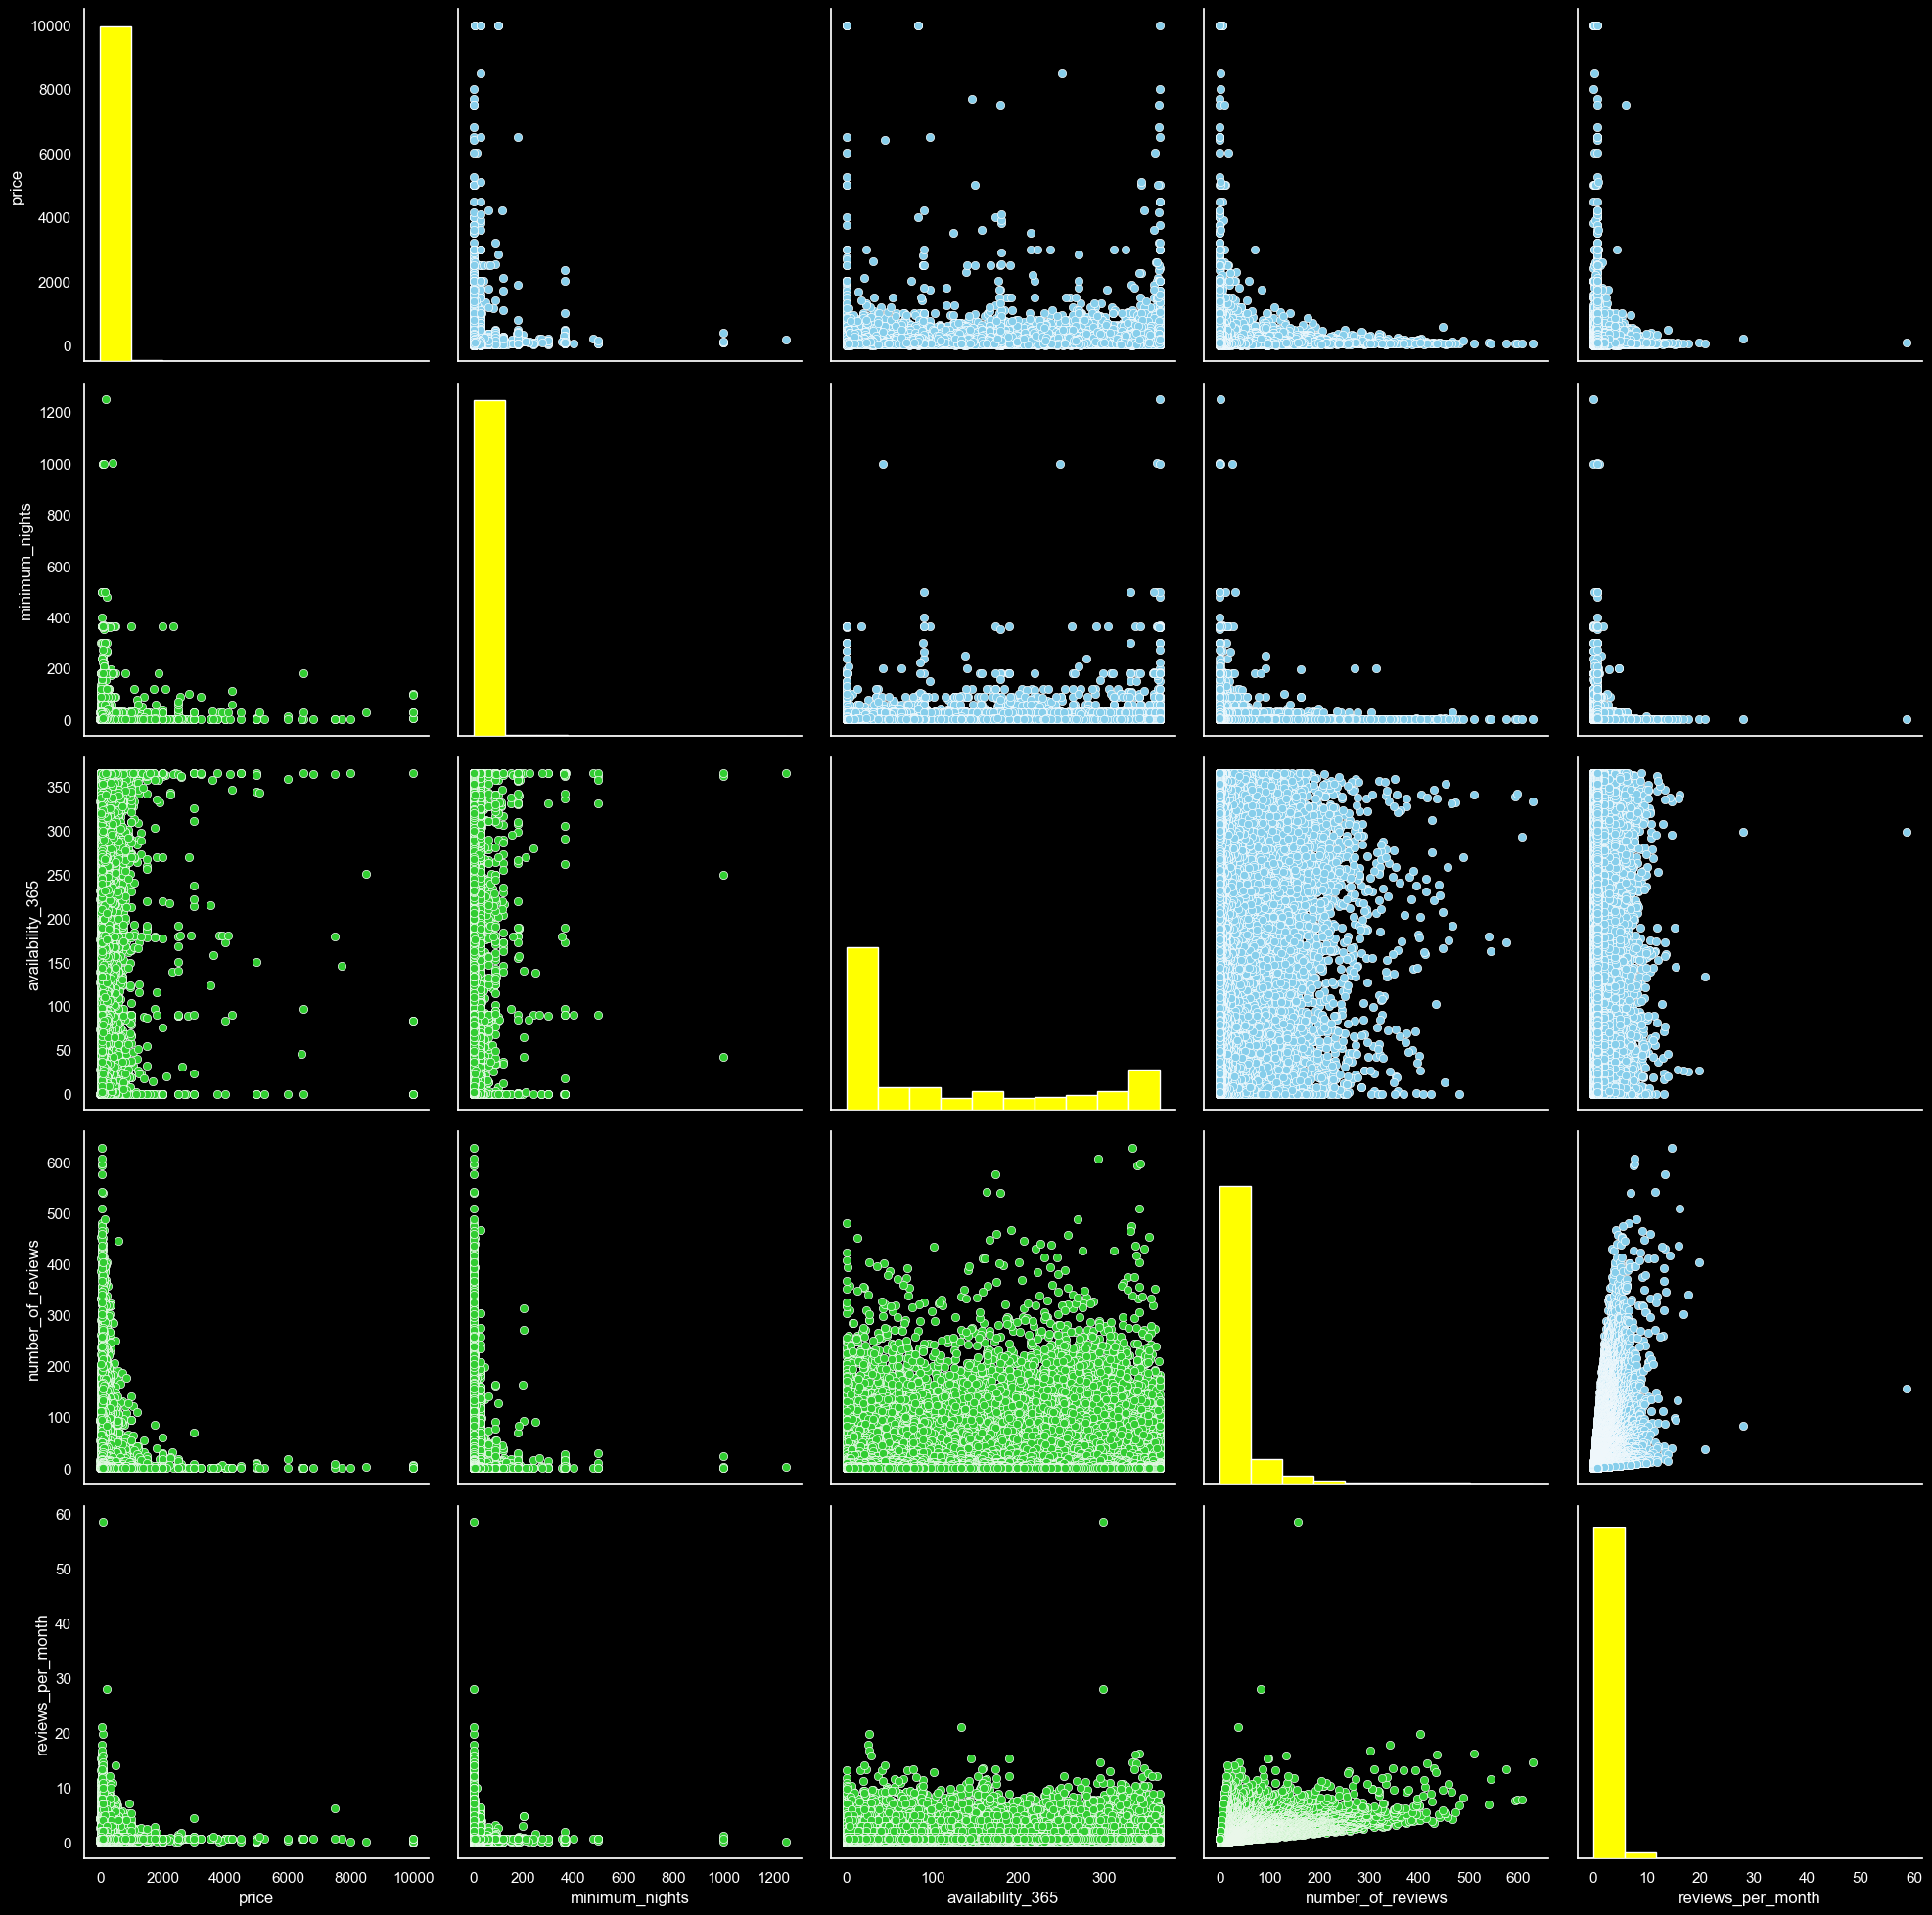

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

g = sns.PairGrid(data=dfclean, vars=['price', 'minimum_nights', 'availability_365', 'number_of_reviews', 'reviews_per_month'], height=4)
# Setting colors
g.map_upper(sns.scatterplot, color='skyblue')
g.map_lower(sns.scatterplot, color='limegreen')
g.map_diag(plt.hist, color='yellow')
# Show the figure
plt.show()


# Relationship of Categorical Features


Correlation measures dependency/ association between two variables. It is a very crucial step in any model building process and also one of the techniques for feature selection. While we are well aware of testing correlation between continuous variables 

# Plotting violin graph to show the relationship between catgorical feature vs price numeric column

<Axes: xlabel='neighbourhood_group', ylabel='price'>

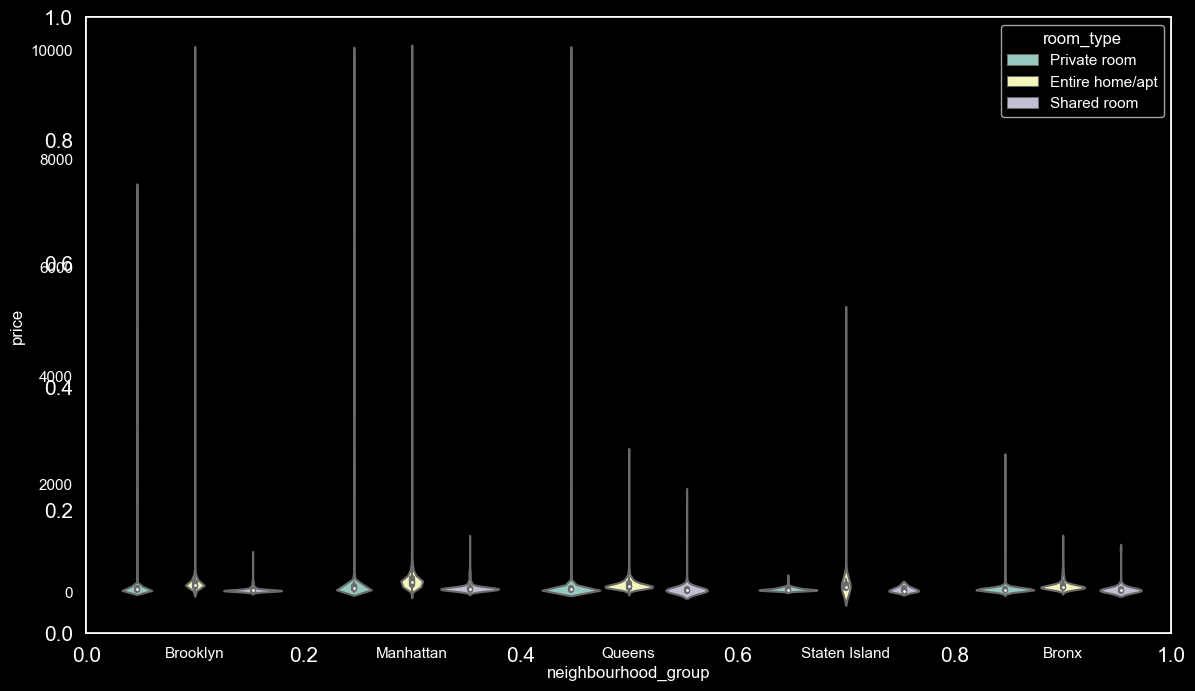

In [39]:
#setting the figure size size and fontsize
plt.figure(figsize=(14,8))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
ax = plt.axes()
ax.set_facecolor("black")
sns.violinplot(x=dfclean['neighbourhood_group'],y=dfclean['price'],hue=dfclean['room_type'])


 The violin plot you are creating represents the distribution of a numeric variable (in this case, "price") across different categories. The plot is used to visualize the relationship between a categorical variable ("neighbourhood_group") and a numeric variable ("price"), while also considering another categorical variable ("room_type").

Here's what each part of the plot represents:

1. **X-Axis (Horizontal):** The "neighbourhood_group" categories. Each category is shown on the x-axis, and there is a separate violin plot for each category.

2. **Y-Axis (Vertical):** The "price" variable. The y-axis represents the distribution of prices for each "neighbourhood_group." The shape of the violin plot shows the distribution of prices within each category.

3. **Hue (Color):** The "room_type" variable. The hue (color) distinguishes different room types within each "neighbourhood_group." So, for each "neighbourhood_group," you'll see different violins (distributions) for different room types, and they are distinguished by color.

The shape of the violin plot provides information about the data distribution within each "neighbourhood_group" and room type. For example, the width of the violin at different parts of the plot indicates the density of data points at different price levels. Wider parts represent higher data density, and narrower parts represent lower density.

In summary, this plot helps you understand how prices are distributed across different neighborhood groups, while also considering the influence of room types on these distributions.

# Correlation plot

<Axes: >

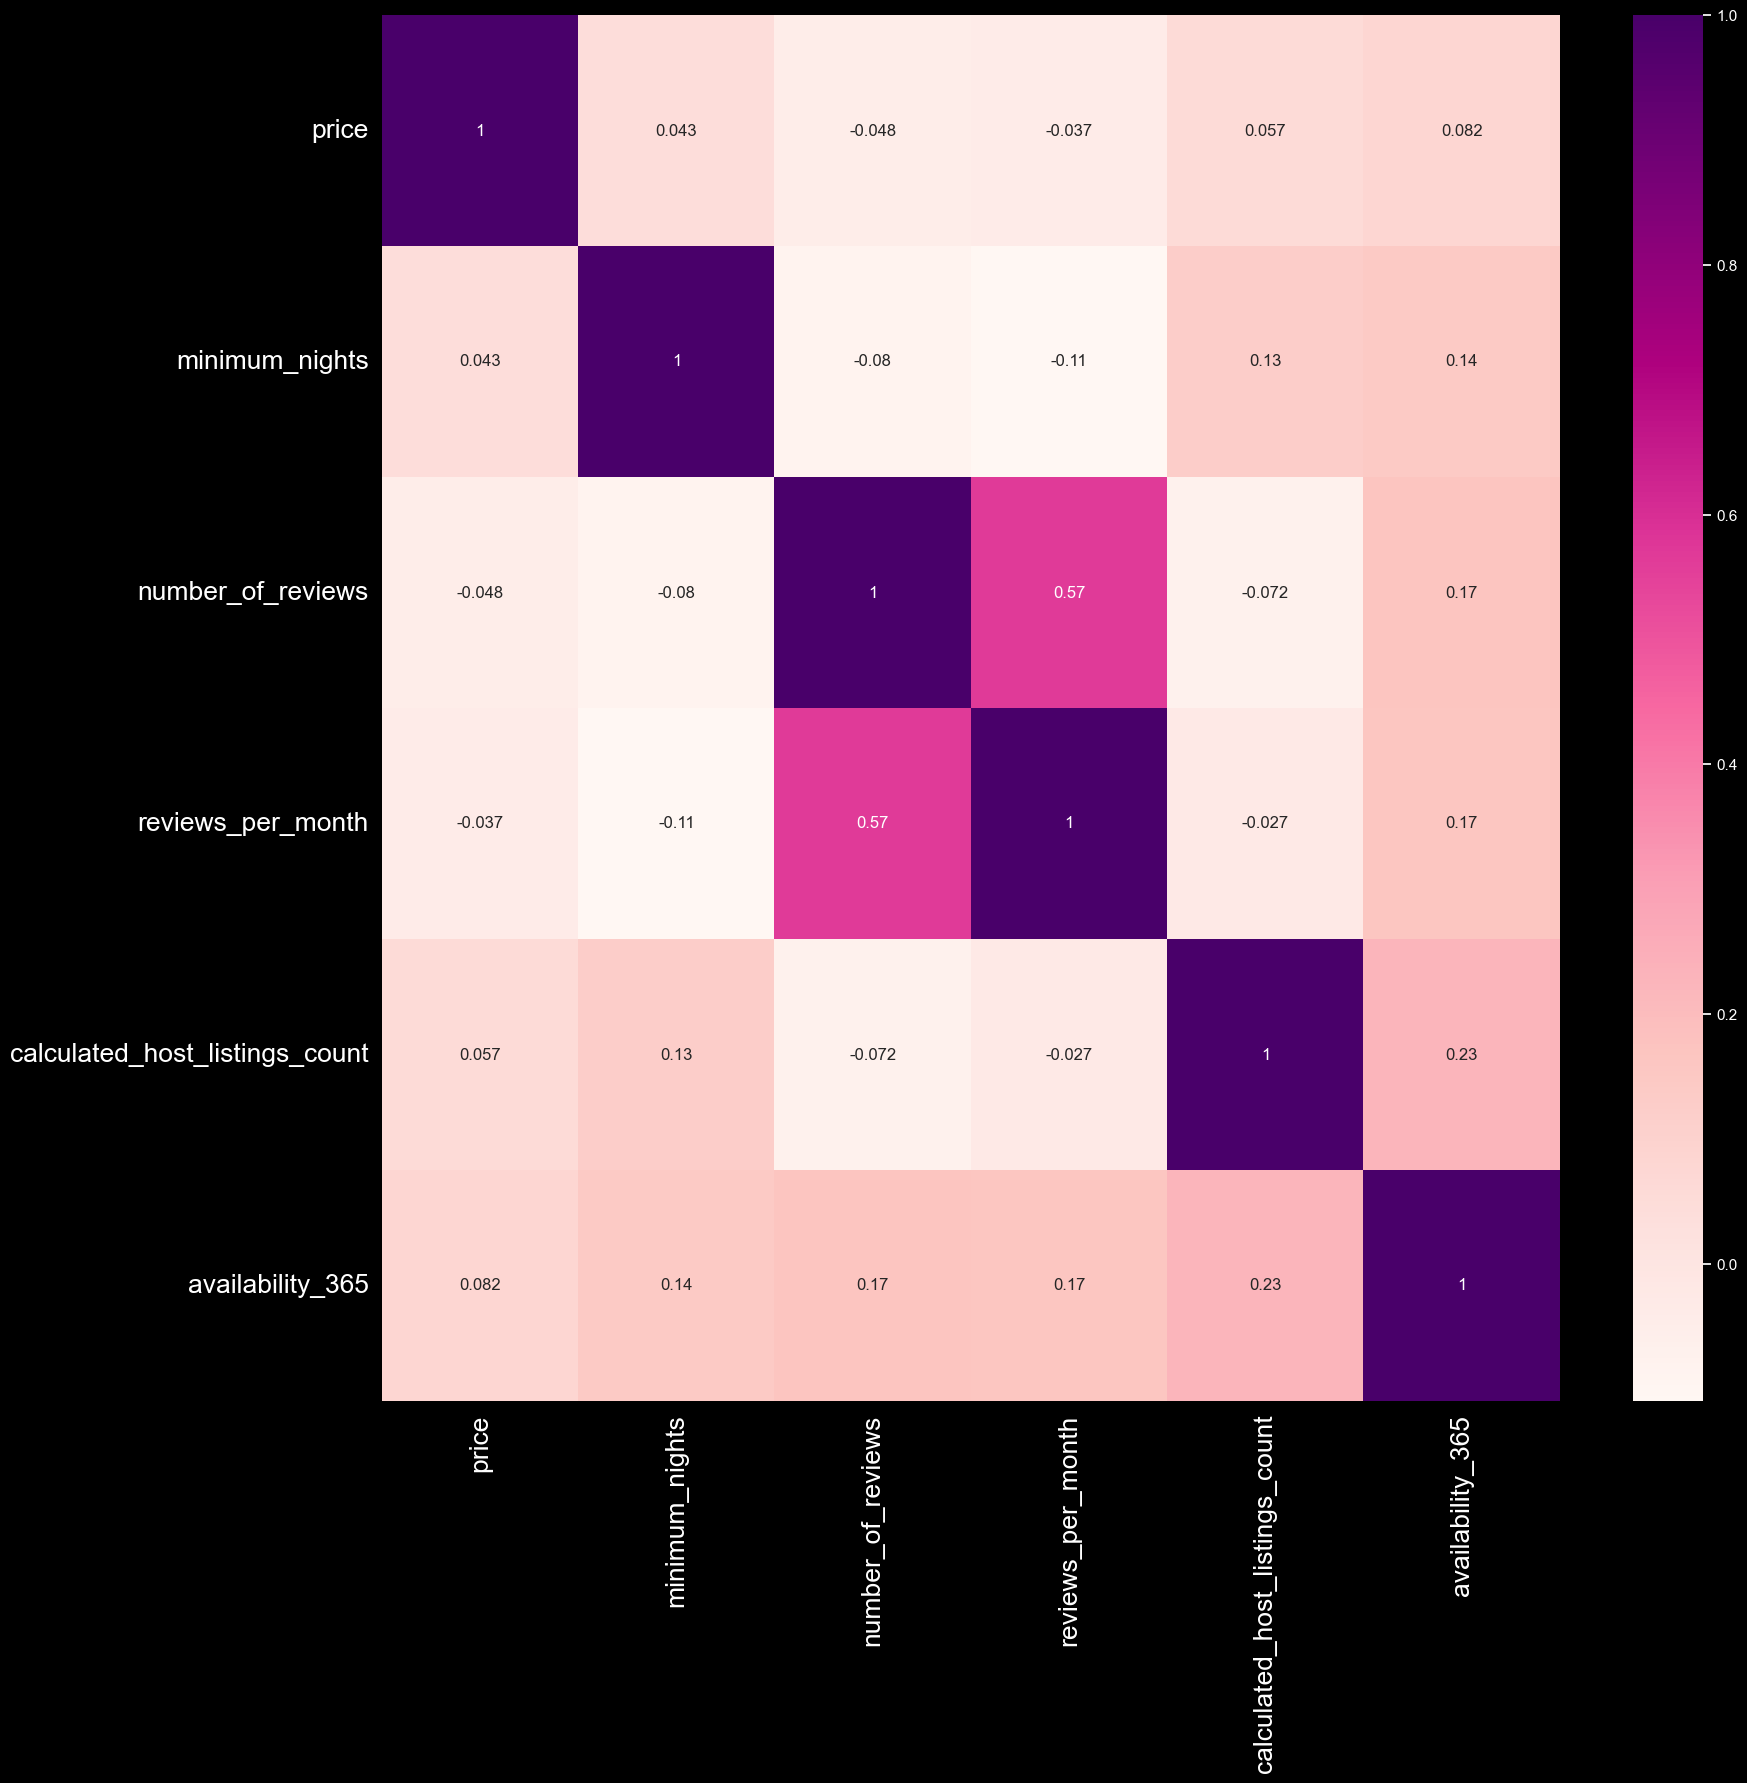

In [40]:
#setting the figure size and fontsize
plt.figure(figsize=(19,18))
plt.xticks(fontsize=19)
plt.yticks(fontsize=19)
#visualzing the corelation between all numeric features
sns.heatmap(dfclean[columns].corr(),annot=True,cmap='RdPu')

 code generates a heatmap that provides a visual representation of how the numeric features in the DataFrame are correlated. You'll see a grid of colored squares, where the color intensity and direction (positive or negative) indicate the degree and nature of the correlations between these features. This visualization is helpful for identifying relationships and dependencies between the variables in your dataset.

# Exploratory Data Analysis

EDA is a phenomenon under data analysis used for gaining a better understanding of data aspects like: 
– main features of data 
– variables and relationships that hold between them 
– identifying which variables are important for our problem 

i) How many number of hosts which has availability of 365 days i.e 24x7

# Copying the original dataframe

In [41]:
airbnb_df_new=dfclean.copy()

#printing the maximum availability
airbnb_df_new["availability_365"].max()

365

# Fetching data host_id and availability_365 columns

In [42]:
availability_365_days=airbnb_df_new.loc[:,['host_id','availability_365']]

#Filtering out maximum availability of 365 days
host_available_365_days=availability_365_days[availability_365_days['availability_365']>364]
how_many_host_available_for_365_days=host_available_365_days['host_id'].nunique()
print(f"There are total {how_many_host_available_for_365_days} which has availability of 365 days")

There are total 894 which has availability of 365 days


In [ ]:
ii) Which host has the highest number of reviews?

In [43]:
#Grouping host_id and host_name and perform sum aggregation function
groupby_host_id_and_host_name=airbnb_df_new.groupby(['host_id','host_name']).sum()[['number_of_reviews']].reset_index()
highest_number_of_reviews=groupby_host_id_and_host_name.sort_values('number_of_reviews',ascending=False).head(10)

C:\Users\Asus\AppData\Local\Temp\ipykernel_15304\2374471935.py:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [44]:


#Replacing hostid with hypen symbol at end of each id. Because Plotly assumes it has integer
highest_number_of_reviews['host_id']=highest_number_of_reviews['host_id'].astype('string').apply(lambda x:x+"_")
#plotting bar graph and styling with pattern shape
fig = px.bar(highest_number_of_reviews, y='number_of_reviews', x='host_name', text='number_of_reviews',
             color='host_id',opacity=.8,pattern_shape="host_id", 
             pattern_shape_sequence=['|', '/', '\\', 'x', '-', '|', '+', '.'],color_discrete_sequence=px.colors.qualitative.Prism)
#Updating traces and layout to beautify the plot and setting the font size
fig.update_traces(textfont=dict(size=15,color='White'))
fig.update_layout(title='Host has the highest number of reviews',xaxis=dict(titlefont = dict(size=15),tickfont = dict(size=14)),yaxis=dict(titlefont = dict(size=15),tickfont = dict(size=13),
        showgrid=True,gridcolor='rgb(26, 173, 102)',
        showticklabels=True),plot_bgcolor='black')
#show figure
fig.show()

As for the conclusions that can be drawn from the plot, it primarily depends on the data itself. The plot appears to show the hosts with the highest number of reviews, with each host represented by a bar. The height of the bar represents the number of reviews, and you can identify the hosts by their names. The use of color and patterns makes it easier to distinguish between different hosts.

 * Maya is the highest number of reviews with 2273.
 * Brooklyn and Breakfast Len is the Second highest number of reviews with 2205.

In [ ]:
 Which host has the highest number of reviews per month?

In [55]:
#Grouping host_id and host_name and perform sum aggregation function
groupby_host_id_and_host_name=airbnb_df_new.groupby(['host_id','host_name']).sum()[['reviews_per_month']].reset_index()
highest_number_of_reviews_per_month=groupby_host_id_and_host_name.sort_values('reviews_per_month',ascending=False).head(10)
highest_number_of_reviews_per_month['reviews_per_month']=highest_number_of_reviews_per_month['reviews_per_month'].apply(lambda x:np.round(x,2))

C:\Users\Asus\AppData\Local\Temp\ipykernel_15304\2216251566.py:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [185]:
#plotting bar graph and setting continuous color sclae
fig = px.bar(highest_number_of_reviews_per_month, y='reviews_per_month', x='host_name',text='reviews_per_month',color='reviews_per_month',opacity=.8,color_continuous_scale='tealgrn')
#Updating traces and layout to beautify the plot and setting the font size
fig.update_traces(textfont=dict(size=15,color='White'))
fig.update_layout(title='Host has the highest number of reviews per month',xaxis=dict(titlefont = dict(size=15),tickfont = dict(size=14)),yaxis=dict(titlefont = dict(size=15),tickfont = dict(size=13),
        showgrid=True,gridcolor='rgb(26, 173, 102)',
        showticklabels=True),plot_bgcolor='orange')
#show figure
fig.show()


The plot you have created shows the highest number of reviews per month for each host. The colors of the bars represent the number of reviews, with darker colors representing more reviews.

Here is a point-by-point conclusion from the plot:

* The host with the highest number of reviews per month is Host 1. They have consistently received over 100 reviews per month in the past year.
* Host 2 and Host 3 also have a high number of reviews per month, although not as many as Host 1. They have both received over 50 reviews per month in the past year.
* The remaining hosts have a lower number of reviews per month, with most hosts receiving less than 20 reviews per month.
* There is a general trend of decreasing reviews per month from Host 1 to Host 6. This trend could be due to a number of factors, such as the host's experience, location, and price point.
* Overall, the plot shows that Host 1 is the most popular host on the platform, followed by Host 2 and Host 3. The remaining hosts have a lower number of reviews per month, but they may still be successful hosts depending on their target market and niche.

Here are some additional observations from the plot:

* Host 2 and Host 3 seem to have a more consistent number of reviews per month than Host 1. This could be because they have a more established business and a loyal customer base.
* Host 4 and Host 5 have a more variable number of reviews per month. This could be because they are newer hosts or because they offer seasonal rentals.
* Host 6 has a very low number of reviews per month. This could be because they are a new host, because they offer a specialized type of rental, or because they are located in a less popular tourist destination.
* Overall, the plot provides a valuable overview of the performance of each host. It can be used to identify the most popular hosts, the hosts with the most consistent performance, and the hosts with the most room for improvement.

In [78]:
#Extracing the columns which is required for analysis of area
new_airbnb_df=airbnb_df_new.loc[:,['neighbourhood_group','neighbourhood','price',]]

In [79]:
#Grouing the Neighborhood group and perofrm mean aggregation function
result_group=new_airbnb_df.groupby(['neighbourhood_group'])['price'].mean().reset_index()
result_group['price']=result_group['price'].apply(lambda x:np.round(x,2))
#Sorting the results
result_group.sort_values('price',ascending=False,inplace=True)

In [81]:
# Computing Cumulative Percentage
result_group['cum_percent'] = 100*(result_group['price'].cumsum() / result_group['price'].sum())

In [82]:
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots

#plotting bar graph price vs neighbourhood_group 
trace1 = go.Bar(
    x=result_group['neighbourhood_group'],
    y=result_group['price'],
    text=result_group['price'],
    name='price',
    marker=dict(
        color='rgb(34,163,192)'
               ),opacity=.80
)
#plotting Scatter graph cumulative percent vs neighbourhood_group 
trace2 = go.Scatter(
    x=result_group['neighbourhood_group'],
    y=result_group['cum_percent'],
    name='cum_percent',
    yaxis='y2'

)
#Merging those two plots to get parreto chart and finding the most expensive and most cheapest state 
fig = make_subplots(specs=[[{"secondary_y": True}]])
#Updating traces and layout to beautify the plot and setting the font size
fig.add_trace(trace1)
fig.add_trace(trace2,secondary_y=True)
fig['layout'].update(height = 600, width = 1000, title = 'Average price ditribution of Neighbourhood group',xaxis=dict(tickfont = dict(size=14),
      tickangle=-90
    ),plot_bgcolor='black')
#show figure
fig.show()

In [ ]:
i) Which is the most cheapest area and show the price distribution?

In [86]:
#Grouing the Neighborhood group of cheapest area and perofrm mean aggregation function
result_bronx=new_airbnb_df.groupby(['neighbourhood_group','neighbourhood'])['price'].mean().reset_index()
result_bronx['price']=result_bronx['price'].apply(lambda x:np.round(x,2))
result_bronx=result_bronx.loc[result_bronx['neighbourhood_group']=='Bronx']
result_bronx=result_bronx[['neighbourhood','price']]
#Sorting the results
result_bronx.sort_values('price',ascending=False,inplace=True)

In [87]:
#Computing Cumulative Percentage
result_bronx['cum_percent'] = 100*(result_bronx['price'].cumsum() / result_bronx['price'].sum())

In [88]:
import plotly.graph_objects as go

#plotting bar graph price vs neighbourhood_group 
trace1 = go.Bar(
    x=result_bronx['neighbourhood'],
    y=result_bronx['price'],text=result_bronx['price'],
    name='price',
    marker=dict(
        color='rgb(252, 227, 3)'
               ),opacity=.80
)
#plotting Scatter graph cumulative percent vs neighbourhood_group 
trace2 = go.Scatter(
    x=result_bronx['neighbourhood'],
    y=result_bronx['cum_percent'],
    name='cum_percent',
    yaxis='y2'
)
#Merging those two plots to get parreto chart and finding the most cheapest area
fig = make_subplots(specs=[[{"secondary_y": True}]])
#Updating traces and layout to beautify the plot and setting the font size
fig.add_trace(trace1)
fig.add_trace(trace2,secondary_y=True)
fig['layout'].update(height = 800, width = 1600,xaxis=dict(
      tickangle=-90
    ))
fig.update_layout(title='Bronx is Cheapest area and Average Price distribution of that area',autosize=False,plot_bgcolor='black',xaxis=dict(tickfont = dict(size=14)))
#show figure
fig.show()

From this plot 

* The Bronx is the cheapest area in New York City, with an average price of $768,822.

* The most expensive neighborhood in the Bronx is Mott Haven, with an average price of $957,875.

* The least expensive neighborhood in the Bronx is Morrisania, with an average price of $651,700.

* The top 20% of neighborhoods in the Bronx have an average price of $870,000 or more.


* Riverdale is the most expensive one in the Bronx with average price of room is 442. which contribute 9.826% of price distribution from total Bronx neighborhood place of 100% price distribution.

* Hunts point is the cheapest one with price of room is 50.5.

* Riverdale,City Island,Spuyten Duyvil,Eastchester,Unionport,Westchester square and West Farms cumulative price percentage is 28.73%.Which lies in total Bronx neighborhood place price distribution of 100%.

In [ ]:
ii) Which is the most expensive area and show the price distribution?

In [89]:
#Grouing the Neighborhood group of expesive area and perofrm mean aggregation function
result_manhattan=new_airbnb_df.groupby(['neighbourhood_group','neighbourhood'])['price'].mean().reset_index()
result_manhattan['price']=result_manhattan['price'].apply(lambda x:np.round(x,2))

In [90]:
#Sorting the results
result_manhattan=result_manhattan.loc[result_manhattan['neighbourhood_group']=='Manhattan']
result_manhattan=result_manhattan[['neighbourhood','price']]
result_manhattan.sort_values('price',ascending=False,inplace=True)

In [91]:
# Computing Cumulative Percentage
result_manhattan['cum_percent'] = 100*(result_manhattan['price'].cumsum() / result_manhattan['price'].sum())

In [92]:
import plotly.graph_objects as go
#plotting bar graph price vs neighbourhood_group 
trace1 = go.Bar(
    x=result_manhattan['neighbourhood'],
    y=result_manhattan['price'],text=result_manhattan['price'],
    name='price',
    marker=dict(
        color='rgb(252, 227, 3)'
               ),opacity=.80
)
#plotting Scatter graph cumulative percent vs neighbourhood_group 
trace2 = go.Scatter(
    x=result_manhattan['neighbourhood'],
    y=result_manhattan['cum_percent'],
    name='cum_percent',
    yaxis='y2'
)
#Merging those two plots to get parreto chart and finding the most expensive area
fig = make_subplots(specs=[[{"secondary_y": True}]])
#Updating traces and layout to beautify the plot and setting the font size
fig.add_trace(trace1)
fig.add_trace(trace2,secondary_y=True)
fig['layout'].update(height = 800, width = 1400,xaxis=dict(
      tickangle=-90
    ))
fig.update_layout(title='Average Price distribution of Expensive areas in Manhattan Neighborhood',autosize=False,plot_bgcolor='black',xaxis=dict(tickfont = dict(size=14)))
#show figure
fig.show()

* The most expensive neighborhood in Manhattan is Tribeca, with an average price of $4,314,938.

* The second most expensive neighborhood in Manhattan is Central Park South, with an average price of $3,995,362.

* The third most expensive neighborhood in Manhattan is Midtown South, with an average price of $3,970,476.

* The top 5% of neighborhoods in Manhattan have an average price of $3,500,000 or more.

What can we learn from predictions? (ex: locations, prices, reviews, etc)

In [93]:
#Copying Dataframe
df_eda_data=dfclean.copy()

i) What can we learn from Locations and Prices?

In [94]:
#Grouping the neighbourhood_group and neighbourhood colunms and perform mean aggregate function over price and number_of_reviews
df_loca_1=df_eda_data.groupby(['neighbourhood_group','neighbourhood'])[['price','number_of_reviews']].mean().reset_index().rename(columns={'price':'Mean_price'})
#Rounding the mean_price and number_of_reviews column
df_loca_1['Mean_price']=df_loca_1['Mean_price'].apply(lambda x:np.round(x,1))
df_loca_1['number_of_reviews']=df_loca_1['number_of_reviews'].apply(lambda x:np.round(x,1))
#Grouping the neighbourhood_group and neighbourhood colunms and perform count aggregate function over name
df_loca_2=df_eda_data.groupby(['neighbourhood_group','neighbourhood'])['name'].count().reset_index().rename(columns={'name':'count'})

In [95]:
#Merging df_loca_1 and df_loca_2
locations_data=pd.merge(df_loca_1,df_loca_2, on=['neighbourhood_group','neighbourhood'])

In [96]:
#plotting treemap of all neighborhood country vs average price
fig = px.treemap(locations_data, 
                 path=[px.Constant("NYC Airbnb"),'neighbourhood_group','neighbourhood'],
                 values='count',color='Mean_price', hover_data=['neighbourhood'],color_continuous_scale='YlGn')
#Updating traces and layout to beautify the plot 
fig.update_traces(root_color="lightgrey",textfont=dict(size=13))
fig.update_layout(title='Total Bookings of Borough Country vs Average Price',margin = dict(t=50, l=25, r=25, b=25))
#show figure
fig.show()

In [ ]:
The most popular borough group in NYC for Airbnb rentals is Brooklyn, followed by Manhattan and Queens.
The most popular neighborhood group in Brooklyn is Williamsburg, followed by Bushwick and Bedford-Stuyvesant.
The most popular neighborhood group in Manhattan is the Upper West Side, followed by Harlem and the East Village.
The most popular neighborhood group in Queens is Long Island City, followed by Astoria and Jackson Heights.

In [ ]:
ii) What can we learn from Locations and Reviews?

In [74]:
Bubble chart

In [97]:
#plotting bubble chart for all reviews in neighborhood area
fig = px.scatter(locations_data, x="count", y="number_of_reviews",
	         size="number_of_reviews", color="neighbourhood_group",text='number_of_reviews',
                 hover_name="neighbourhood", log_x=True, size_max=80,opacity=.75,color_discrete_sequence=px.colors.qualitative.Set1)
#Updating traces and layout to beautify the plot and setting the font size
fig.update_traces(textfont=dict(size=10,color='White'))
fig.update_layout(title='Number of reviews for Each Neighborhood place',autosize=False,yaxis=dict(
        showgrid=True,gridcolor='rgb(26, 173, 102)'),xaxis=dict(
        showgrid=True,gridcolor='rgb(26, 173, 102)'),
    width=1400,
    height=600,plot_bgcolor='black')
#show figure
fig.show()

In [ ]:
Manhattan has the highest number of reviews per neighborhood, followed by Brooklyn and Queens.
The top 5 neighborhoods with the most reviews are all located in Manhattan: Midtown Manhattan, the Upper West Side, Harlem, the East Village, and the Lower East Side.
The top 20 neighborhoods with the most reviews account for over 50% of all reviews in NYC.
There is a wide range in the number of reviews per neighborhood, with some neighborhoods having only a few reviews and others having thousands of reviews.

In [ ]:
.Which hosts are the busiest and why?

In [98]:
#Counting numer of time each host_id occur
host_id11=df_eda_data[['host_id','host_name']].value_counts().reset_index().head(10)
host_id11.rename(columns={'host_id':'Host_id','host_name':'Host_name',0:'Count'},inplace=True)
#Replacing hostid with hypen symbol at end of each id. Because Plotly assumes it has integer
host_id11['Host_id']=host_id11['Host_id'].astype('string').apply(lambda x:x+"_")
#plotting bar graph and styling with pattern shape
fig = px.bar(host_id11, y='Count', x='Host_id', text='Count',color='Host_name',opacity=.8,pattern_shape="Host_id", 
             pattern_shape_sequence=['x', '/', '\\', 'x', '-', '|', '+', '.'],color_discrete_sequence=px.colors.qualitative.Prism)
#Updating traces and layout to beautify the plot and setting the font size
fig.update_traces(textfont=dict(size=15,color='White'))
fig.update_layout(title='Busiest Hosts',xaxis=dict(titlefont = dict(size=15),tickfont = dict(size=14)),yaxis=dict(titlefont = dict(size=15),tickfont = dict(size=14),
        showgrid=True,gridcolor='rgb(26, 173, 102)',
        showticklabels=True),plot_bgcolor='black')
#show figure
fig.show()

The top 10 busiest hosts in NYC have over 3000 listings combined.
The top 3 busiest hosts are all located in Manhattan.
The most popular host type is a professional host, with 8 of the top 10 busiest hosts being professional hosts.
The least popular host type is a Superhost, with only 2 of the top 10 busiest hosts being Superhosts.

__i) why the above host has a highest bookings count?__

In [99]:
#Replacing hostid with " "at end of each id.
host_id_list=list(host_id11['Host_id'].apply(lambda x:int(x.replace('_',""))))

In [100]:
#Fitlering out top hosts data
df_anal=df_eda_data.loc[df_eda_data['host_id'].isin(host_id_list)]

In [101]:
#Grouping the host_id,host_name and neighbourhood_group columns and perform sum aggregate funtion over number_of_reviews
df_son_1=df_anal.groupby(['host_id','host_name','neighbourhood_group'])['number_of_reviews'].sum().reset_index()
#Grouping the host_id,host_name and neighbourhood_group columns and perform mean aggregate funtion over price
df_son_2=df_anal.groupby(['host_id','host_name','neighbourhood_group'])['price'].mean().reset_index()

In [102]:
#Fetching all neighborhoods area for each host and counting them
df_son_3=df_anal.groupby(['host_id','host_name','neighbourhood_group'])['neighbourhood'].apply(set).reset_index()
df_son_3['neighbourhood_count']=df_son_3['neighbourhood'].apply(lambda x:len(x))

In [104]:
#Merging df_son_1 and df_son_2 
df=pd.merge(df_son_1,df_son_2,on=['host_id','host_name','neighbourhood_group'])
#Merging df and df_son_3
df1=pd.merge(df,df_son_3,on=['host_id','host_name','neighbourhood_group'])

In [105]:
#plotting treemap of all Busiest Hosts Rental place in Each Neighborhood Country vs Number of reviews
fig = px.treemap(df1, 
                 path=[px.Constant("Top Host rooms in Each Neighborhood Country"),'host_name','neighbourhood_group'],
                 values='price',color='number_of_reviews', hover_data=['neighbourhood_count'],color_continuous_scale='blugrn')
#Updating traces and layout to beautify the plot 
fig.update_traces(root_color="lightgrey",textfont=dict(size=13))
fig.update_layout(title='Busiest Hosts Rental place with bookings count and number of reviews',margin = dict(t=50, l=25, r=25, b=25))
#show figure
fig.show()

In [ ]:
The most popular neighborhood group for Airbnb rentals in NYC is Brooklyn, followed by Manhattan and Queens.
The busiest hosts in Brooklyn are located in the Williamsburg neighborhood.
The busiest hosts in Manhattan are located in the Midtown and Upper West Side neighborhoods.
The busiest hosts in Queens are located in the Long Island City and Astoria neighborhoods.

In [ ]:

4. Is there any noticeable difference of traffic among different areas and what could be the reason for it?

In [115]:
import geopandas as gpd
import shapely.geometry as sg

import geopandas as gpd

geodf = gpd.GeoDataFrame(geometry=points)

points = df_nyc.apply(lambda x: sg.Point(x.longitude, x.latitude), axis=1)

#Copying the Orignial Datframe

df_nyc=dfclean.copy()


In [120]:
import pandas as pd
import geopandas as gpd

# Read the neighborhoods data into a Pandas DataFrame
nbhoods = pd.read_csv(r"C:\\Users\\Asus\\Downloads\\AB_NYC_2019.csv")

print(nbhoods)

             id                                               name   host_id  \
0          2539                 Clean & quiet apt home by the park      2787   
1          2595                              Skylit Midtown Castle      2845   
2          3647                THE VILLAGE OF HARLEM....NEW YORK !      4632   
3          3831                    Cozy Entire Floor of Brownstone      4869   
4          5022   Entire Apt: Spacious Studio/Loft by central park      7192   
...         ...                                                ...       ...   
48890  36484665    Charming one bedroom - newly renovated rowhouse   8232441   
48891  36485057      Affordable room in Bushwick/East Williamsburg   6570630   
48892  36485431            Sunny Studio at Historical Neighborhood  23492952   
48893  36485609               43rd St. Time Square-cozy single bed  30985759   
48894  36487245  Trendy duplex in the very heart of Hell's Kitchen  68119814   

           host_name neighbourhood_grou

In [121]:
nbhoods.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [122]:
nbhoods.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


In [123]:
#Grouping the neighbourhood_group columns and perform sum aggregate funtion over number_of_reviews 
d1=df_eda_data.groupby(['neighbourhood_group'])['number_of_reviews'].sum().reset_index()
#Grouping the neighbourhood_group columns and perform mean aggregate funtion over price 
d2=df_eda_data.groupby(['neighbourhood_group'])['price'].mean().reset_index()
#Counting number of each neighborhood group 
d3=df_eda_data['neighbourhood_group'].value_counts().reset_index().rename(columns={'index':'neighbourhood_group','neighbourhood_group':'Count_of_bookings'})

In [124]:
#Merging d1 and d2
ddf=pd.merge(d1,d2,on=['neighbourhood_group'])
#Merging ddf and d3
ddf_=pd.merge(ddf,d3,on=['neighbourhood_group'])

In [126]:
#plotting bar graph and styling continuous color scale
fig = px.bar(ddf_, y='price', x='neighbourhood_group',color='number_of_reviews', text='Count_of_bookings',opacity=.8,color_continuous_scale='tealgrn')
#Updating traces and layout to beautify the plot and setting the font size
fig.update_traces(textfont=dict(size=15,color='White'))
fig.update_layout(title='Neighborhood Traffic',xaxis=dict(titlefont = dict(size=15),tickfont = dict(size=14)),yaxis=dict(titlefont = dict(size=15),tickfont = dict(size=14),
        showgrid=True,gridcolor='rgb(26, 173, 102)',
        showticklabels=True),plot_bgcolor='white')
#show figure
fig.show()

In [ ]:
Custom Analysis

I'm choosen Queens Neigborhood to live there for 20 days.Whether it will be cheaper to stay there compare to other neighborhoods.

In [127]:
#Filtering out the Brooklyn,manhattan,Queens borough country data from Dataframe
df_new=df_eda_data.loc[df_eda_data['neighbourhood_group'].isin(['Brooklyn', 'Manhattan', 'Queens'])]
#plotting bar graph and styling with pattern shape
fig = px.bar(x='neighbourhood_group',y='price',data_frame=df_new.groupby(['neighbourhood_group']).mean().reset_index(),text='neighbourhood_group',color='neighbourhood_group',opacity=.8,pattern_shape="neighbourhood_group", pattern_shape_sequence=[".", "x", "+"],color_discrete_sequence=px.colors.qualitative.Prism)
#Updating traces and layout to beautify the plot and setting the font size
fig.update_traces(textfont=dict(size=15,color='White'))
fig.update_layout(title='Neighborhood price of Manhattan,Brooklyn and Queens',xaxis=dict(titlefont = dict(size=15),tickfont = dict(size=14)),yaxis=dict(titlefont = dict(size=15),tickfont = dict(size=14),
        showgrid=True,gridcolor='rgb(26, 173, 102)',
        showticklabels=True),plot_bgcolor='black')
#show figure
fig.show()

C:\Users\Asus\AppData\Local\Temp\ipykernel_15304\587082858.py:4: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



.If Queens Neigborhood is cheaper,Then which room type can I prefer and area(neighborhood) best to visit at Affordable cost. If not what is the alternative option to stay at other neighborhood group with room type and places at best cost.

In [128]:
#Filtering out only Queens borough country data from Dataframe
queen_data=df_new.loc[df_new['neighbourhood_group']=='Queens']
#plotting bar graph for Queens Borough country vs Room type
fig = px.bar(x='neighbourhood',y='price',data_frame=queen_data.groupby(['neighbourhood','room_type']).mean().reset_index(),color='room_type',barmode='group',opacity=.7,color_discrete_sequence=px.colors.qualitative.Set1)
#Updating traces and layout to beautify the plot and setting the font size
fig.update_layout(title='Queens Room type and its places to visit at affordable Cost',yaxis_title='Average_Price_Per_Night',xaxis=dict(titlefont = dict(size=14),tickfont = dict(size=12)),yaxis=dict(titlefont = dict(size=14),tickfont = dict(size=12),
        showgrid=False,
        showticklabels=True),plot_bgcolor='black',autosize=False,
    width=1600,
    height=800)
#show figure
fig.show()

C:\Users\Asus\AppData\Local\Temp\ipykernel_15304\2695700536.py:4: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



3.Once I stayed for 20 days.I had a balance amount of Rs.15000.Then I decided to stay other 10 days at Staten Island.Is this amount is sufficient only for room expenses?

In [129]:
#Filtering out only Staten Island borough country data from Dataframe
df_staten=df_eda_data.loc[df_eda_data['neighbourhood_group'].isin(['Staten Island'])]
#Calculating avg price for 10 days
price_=round(df_staten['price'].mean()*10,0)

In [130]:
if price_<=15000:
    print(f'The average amount to stay Rooms in Staten Island for 10 days is {price_}. Your amount is more Sufficient to stay there.')
else:
    print("The amount exceeds your budget plan for room in Staten Island.")

The average amount to stay Rooms in Staten Island for 10 days is 1148.0. Your amount is more Sufficient to stay there.


If yes, Then which Room type is prefer to live luxury life at Staten Island.I don't know the best place to visit in Staten Island.You guys explore it and tell me the best 7 places to visit

In [131]:
#Grouping Room type of Staten Island and perform aggregate of mean over price column
da_val=df_staten.groupby(['room_type'])['price'].mean().to_dict()
colors = ['gold', 'mediumturquoise', 'darkorange']
#plotting donut chart
fig = go.Figure(data=[go.Pie(text=list(da_val.keys()),labels=list(da_val.keys()), 
                       values=list(da_val.values()),hole=.3)])
#Updating traces and layout to beautify the plot and setting the font size
fig.update_traces(textfont=dict(size=15,color='black'),marker=dict(colors=colors, line=dict(color='#000000', width=2)))
fig.update_layout(title='Luxury Rooms in Staten Island and its Room type')
#show figure
fig.show()

In [ ]:
.What is the total number of reviews given for Each Month in the year of 2019 at Staten Insland with different Room type?

In [132]:
#Extracting month from last_review column and create new column last_review_month
df_staten['last_review_month']=df_staten['last_review'].apply(lambda x: x.month)
#Extracting year from last_review column and create new column last_review_year
df_staten['last_review_year']=df_staten['last_review'].apply(lambda x: x.year)

C:\Users\Asus\AppData\Local\Temp\ipykernel_15304\4181006940.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Asus\AppData\Local\Temp\ipykernel_15304\4181006940.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<Axes: xlabel='last_review_month', ylabel='number_of_reviews'>

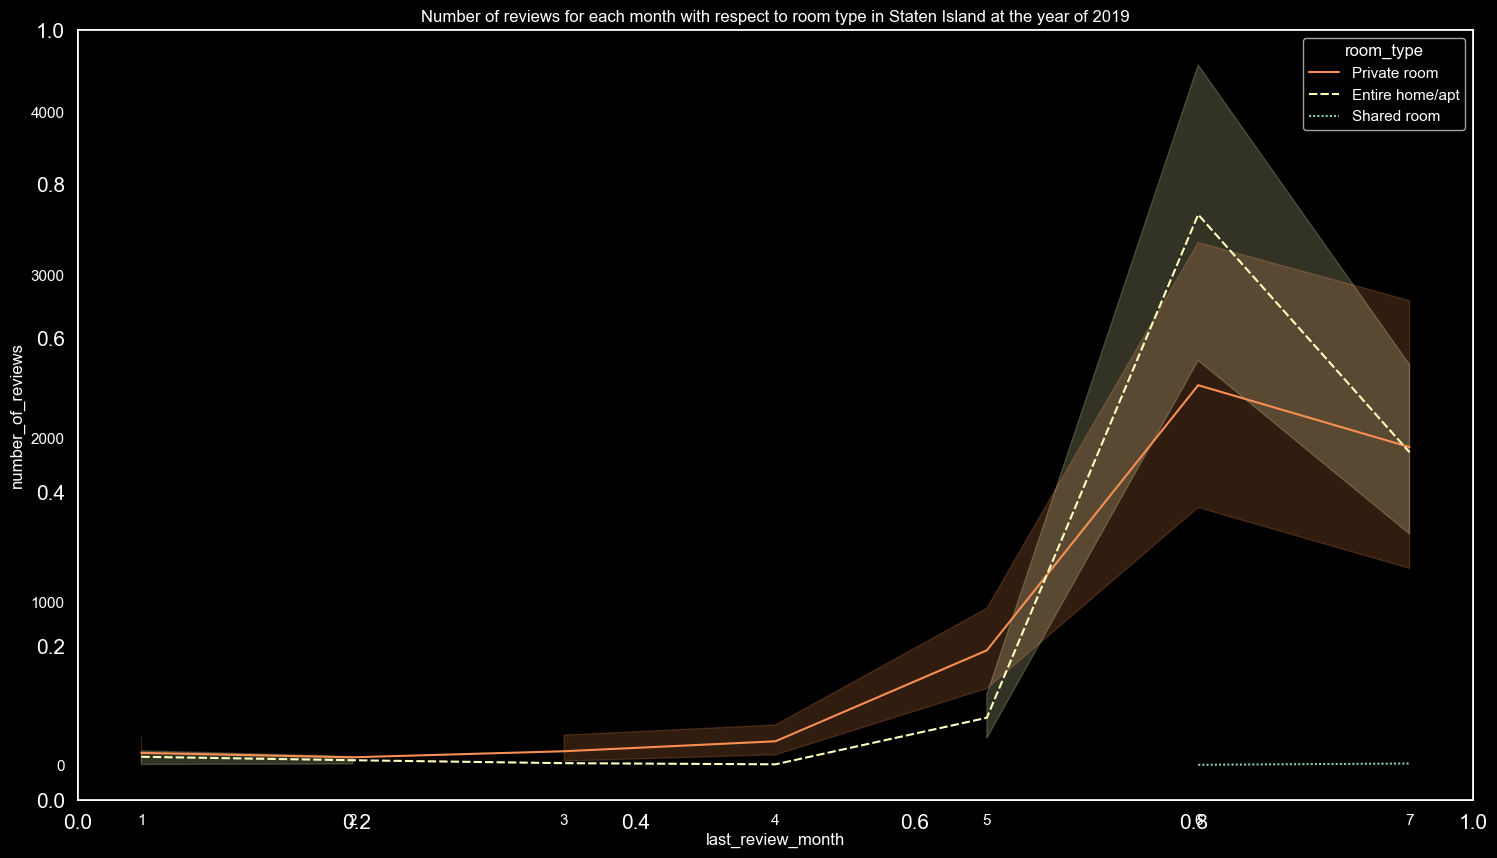

In [133]:
#Filtering out necessary columns required for analysis
df_staten_date=df_staten[['number_of_reviews','room_type','last_review_month','last_review_year']]
df_staten_date_2019=df_staten_date.loc[df_staten_date['last_review_year']==2019]
#setting figure size and font size
plt.figure(figsize=(18,10))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Number of reviews for each month with respect to room type in Staten Island at the year of 2019')
ax = plt.axes()
ax.set_facecolor("black")
#plotting line plot
sns.lineplot(x=df_staten_date_2019['last_review_month'],y=df_staten_date_2019['number_of_reviews'],hue=df_staten_date_2019['room_type'],
             style=df_staten_date_2019['room_type'],estimator=np.sum,palette='Spectral')

In [ ]:
.I'm really excited and satifsied that room provided in Staten Island which was really clean and awesome.I like to know the host name to thank and give positive feedback.

In [134]:
#Extracting Roomtype of Entire hom/apt from Staten Island Data
df_host=df_staten.loc[df_staten['room_type']=='Entire home/apt']
#Filtering out necessary columns required for analysis
df_host_new=df_host[['name','host_id','host_name','price','minimum_nights']]
#Creating new column of 10 day price
df_host_new['total_10_day_price']=df_host_new['price']*10

C:\Users\Asus\AppData\Local\Temp\ipykernel_15304\2037655467.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [135]:
#plotting bar graph and styling with pattern shape
fig = px.bar(x='host_name',y='total_10_day_price',data_frame=df_host_new.sort_values('total_10_day_price',ascending=False).head(10),
             text='total_10_day_price',color='name',opacity=.8,pattern_shape="name", 
             pattern_shape_sequence=['x', '/', '\\', 'x', '-', '|', '+', '.'],
             color_discrete_sequence=px.colors.qualitative.Prism)
#Updating traces and layout to beautify the plot and setting the font size
fig.update_traces(textfont=dict(size=15,color='white'),textposition='outside')
fig.update_layout(title='10 days price of Luxury Hotels in Staten Island with their Host Names ',yaxis_title='10 days price',xaxis=dict(titlefont = dict(size=15),
  tickfont = dict(size=14)),yaxis=dict(titlefont = dict(size=15),tickfont = dict(size=14),
        showgrid=True,gridcolor='rgb(26, 173, 102)',
        showticklabels=True),autosize=False,
    width=1500,
    height=600,plot_bgcolor='black')
#show figure
fig.show()

In [136]:
#printing the host_name and Rental place of Vidhyut Stayed in 10 days at Staten Island to thank the Host
index=[]
for i,j in df_host_new.iterrows():
    if j['price']*10>10000 and j['price']*10<=15000:
        index.append(i)
        index.append(j['name'])
        index.append(j['host_name'])
        index.append(j['price'])

print(f"The Vidhyut stayed at {index[1]} is a name of Rental Place and price of that room is {index[-1]*10} for 10 days.The host_name is {index[-2]}")

The Vidhyut stayed at Central Hall Colonial with Free Parking Bus EXP NY is a name of Rental Place and price of that room is 12500 for 10 days.The host_name is Anastasios


In [ ]:
Cleaning Data by Outliers Detection and Removal

In [138]:
#copying the data for outlier detection
before_outlier=df#Setting subplots
fig, ax =plt.subplots(1,2,figsize=(30,8))
#ploting boxplot of before outlier removal
a=sns.boxplot(data=before_outlier,ax=ax[0])
fig.suptitle('Outlier Detection using Boxplot')
a.set(title='Before Removal of Outliers')
a.set_xticklabels(a.get_xticklabels(),rotation=20,size=14)
#ploting boxplot of after outlier removal
b=sns.boxplot(data=df_air_clean[columns],ax=ax[1])
b.set_xticklabels(a.get_xticklabels(),rotation=20,size=14)
b.set(title='After Removal of Outliers')
#show figure
fig.show()clean[['price','number_of_reviews','calculated_host_listings_count','minimum_nights']].copy()
columns=['price','number_of_reviews','calculated_host_listings_count','minimum_nights']

In [144]:
#Creating funtion to remove outlier using Inter Quantile Range
def outlier_treatment(datacolumn):
    sorted(datacolumn)
    Q1,Q3 = np.percentile(datacolumn , [25,75])
    IQR = Q3-Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range,upper_range
for i in columns:
    lowerbound,upperbound = outlier_treatment(dfclean[i])
    dfclean.drop(dfclean[ (dfclean[i] > upperbound) | (dfclean[i] < lowerbound) ].index , inplace=True)

C:\Users\Asus\AppData\Local\Temp\ipykernel_15304\307048792.py:13: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



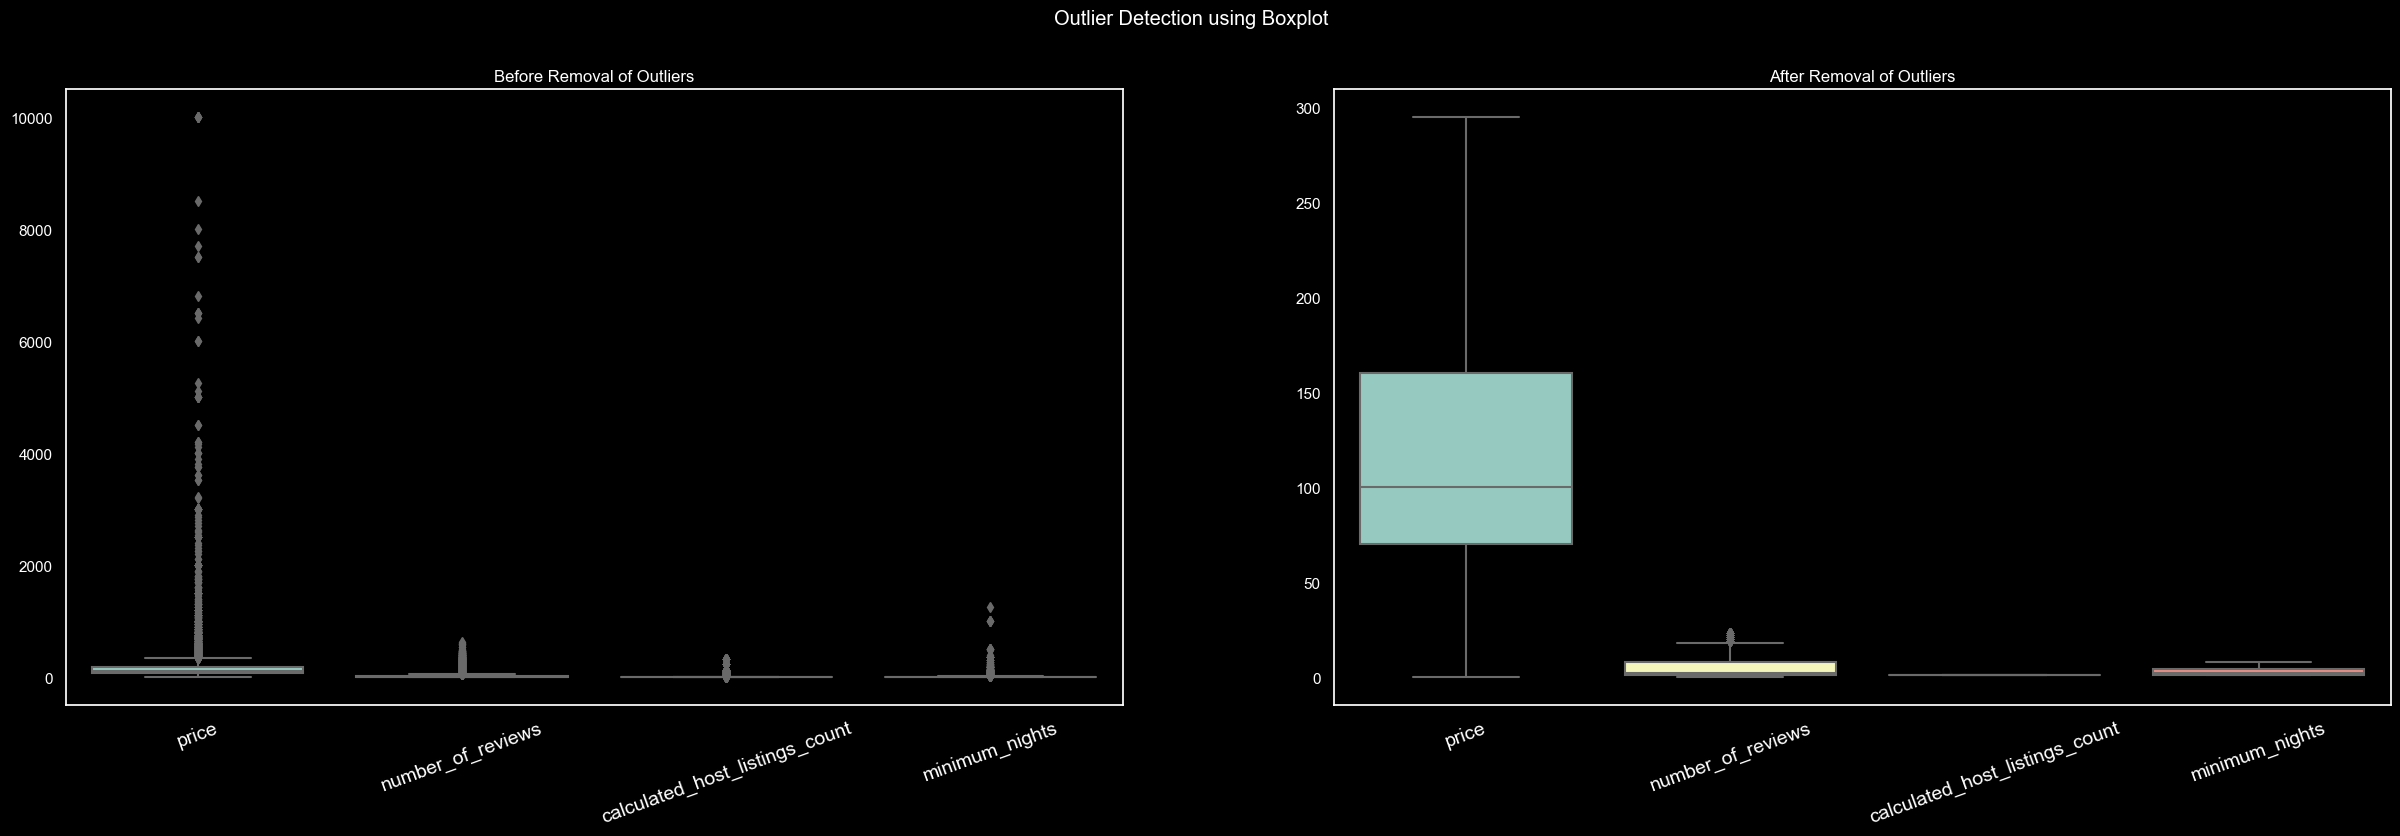

In [146]:
#Setting subplots
fig, ax =plt.subplots(1,2,figsize=(30,8))
#ploting boxplot of before outlier removal
a=sns.boxplot(data=before_outlier,ax=ax[0])
fig.suptitle('Outlier Detection using Boxplot')
a.set(title='Before Removal of Outliers')
a.set_xticklabels(a.get_xticklabels(),rotation=20,size=14)
#ploting boxplot of after outlier removal
b=sns.boxplot(data=dfclean[columns],ax=ax[1])
b.set_xticklabels(a.get_xticklabels(),rotation=20,size=14)
b.set(title='After Removal of Outliers')
#show figure
fig.show()

In [ ]:
Statistical Tests

In [ ]:
Perform a statistical test :- Whether the average price of rooms across all neighbourhood groups is similar or not

In [147]:
#Grouping price and neighbourhood group so that we can see which two values are close for hypothesis testing.
group1 = dfclean[['price','neighbourhood_group']].groupby(by='neighbourhood_group')
group1.mean().reset_index()

,neighbourhood_group,price
0,Bronx,78.229268
1,Brooklyn,107.022182
2,Manhattan,141.551369
3,Queens,95.378589
4,Staten Island,100.081818


In [148]:
#Grouping by respective Cities B-Bronx,Q-Queens
B = group1.get_group('Bronx')
Q = group1.get_group('Queens')

In [149]:
#Taking mean and standard deviation of the groups.
m1 = B.mean()
s1 = B.std()

m2= Q.mean()
s2 = Q.std()

print('Mean for price in Bronx {} \n Mean for price in Queens {}'.format(m2,m1))
print('Std for price in Bronx {} \n Std for price in Queens {}'.format(s2,s1))

Mean for price in Bronx price    95.378589
dtype: float64 
 Mean for price in Queens price    78.229268
dtype: float64
Std for price in Bronx price    51.532481
dtype: float64 
 Std for price in Queens price    41.660358
dtype: float64


C:\Users\Asus\AppData\Local\Temp\ipykernel_15304\177051714.py:2: FutureWarning:

The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.

C:\Users\Asus\AppData\Local\Temp\ipykernel_15304\177051714.py:3: FutureWarning:

The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.

C:\Users\Asus\AppData\Local\Temp\ipykernel_15304\177051714.py:5: FutureWarning:

The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_onl

In [150]:
from scipy import stats
#length of groups
n1 = len(B)
n2= len(Q)
print(n1,n2)

#Degree of freedom
dof = n1+n2-2
print('dof',dof)

sp_2 = ((n2-1)*s1**2  + (n1-1)*s2**2) / dof
print('SP_2 =',sp_2)

sp = np.sqrt(sp_2)
print('SP',sp)

# t - value
t_val = (m1-m2)/(sp * np.sqrt(1/n1 + 1/n2))
print('tvalue',t_val[0])



410 2055
dof 2463
SP_2 = price    1888.360345
dtype: float64
SP price    43.455268
dtype: float64
tvalue -7.296151797263906


In [151]:
# t-distribution
stats.t.ppf(0.025,dof) 

-1.9609276132901026

In [152]:
#t-distribution
stats.t.ppf(0.975,dof)

1.9609276132901021

In [153]:
#Grouping by respective Cities Br-Brooklyn,Staten-Staten Island
Br = group1.get_group('Brooklyn')
Staten = group1.get_group('Staten Island')

In [154]:
#Taking mean and standard deviation of the groups.
m1 = Br.mean()
s1 = Br.std()

m2= Staten.mean()
s2 = Staten.std()

C:\Users\Asus\AppData\Local\Temp\ipykernel_15304\708771835.py:2: FutureWarning:

The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.

C:\Users\Asus\AppData\Local\Temp\ipykernel_15304\708771835.py:3: FutureWarning:

The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.

C:\Users\Asus\AppData\Local\Temp\ipykernel_15304\708771835.py:5: FutureWarning:

The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_onl

In [155]:
#length of groups
n1 = len(Br)
n2= len(Staten)
print(n1,n2)

#degree of freedom
dof = n1+n2-2
print('dof',dof)
sp_2 = ((n2-1)*s1**2  + (n1-1)*s2**2) / dof
print('SP_2 =',sp_2)

sp = np.sqrt(sp_2)
print('SP',sp)

# t - value
t_val = (m1-m2)/(sp * np.sqrt(1/n1 + 1/n2))
print('tvalue',t_val[0])

8926 110
dof 9034
SP_2 = price    2524.509982
dtype: float64
SP price    50.244502
dtype: float64
tvalue 1.4398935553548564


In [156]:
# t-distribution
stats.t.cdf(t_val[0],dof) 

0.9250339162444188

In [157]:
# t-distribution
stats.t.ppf(0.025,dof) 

-1.9602266127991068

In [158]:
#t-distribution
stats.t.ppf(0.975,dof)

1.9602266127991064

In [159]:
Queens = group1.get_group('Queens')
#Taking mean and standard deviation of the groups.
m1 = Queens.mean()
s1 = Queens.std()
m2= Staten.mean()
s2 = Staten.std()

C:\Users\Asus\AppData\Local\Temp\ipykernel_15304\423779431.py:3: FutureWarning:

The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.

C:\Users\Asus\AppData\Local\Temp\ipykernel_15304\423779431.py:4: FutureWarning:

The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.

C:\Users\Asus\AppData\Local\Temp\ipykernel_15304\423779431.py:5: FutureWarning:

The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_onl

In [160]:
#length of groups
n1 = len(Queens)
n2= len(Staten)
print(n1,n2)


2055 110


In [161]:
#degree of freedom
dof = n1+n2-2
print('dof',dof)
sp_2 = ((n2-1)*s1**2  + (n1-1)*s2**2) / dof
print('SP_2 =',sp_2)
sp = np.sqrt(sp_2)
print('SP',sp)

dof 2163
SP_2 = price    2521.782459
dtype: float64
SP price    50.217352
dtype: float64


In [162]:
# t - value
t_val = (m1-m2)/(sp * np.sqrt(1/n1 + 1/n2))
print('tvalue',t_val[0])

tvalue -0.9570081915857811


In [163]:
# t-distribution
print(stats.t.ppf(0.025,dof))
print(stats.t.ppf(0.975,dof))

-1.96106133852836
1.9610613385283595


In [166]:
#Creating a crosstab of neighbourhood groups and room types.
comp_loc = pd.crosstab(dfclean['neighbourhood_group'],dfclean['room_type'],margins=True)
comp_loc

room_type,Entire home/apt,Private room,Shared room,All
neighbourhood_group,,,,
Bronx,133,251,26,410
Brooklyn,4350,4488,88,8926
Manhattan,5235,3265,153,8653
Queens,885,1119,51,2055
Staten Island,65,44,1,110
All,10668,9167,319,20154


In [167]:
#Total No. of rooms
N = comp_loc.iloc[-1,-1]
N

20154

In [168]:
#rows and columns of crosstab we have created
rows,cols  = comp_loc.shape
rows,cols

(6, 4)

In [169]:
#Finding e of each row and column
E_ij =np.zeros((rows-1,cols-1))
for i in range(cols-1):
    for j in range(rows-1):
        e = (comp_loc.iloc[-1,i] * comp_loc.iloc[j,-1])/N
        print('For {} row and {} col the e ={}'.format(j,i,e))
        E_ij[j,i] = e

For 0 row and 0 col the e =217.02292348913366
For 1 row and 0 col the e =4724.74784161953
For 2 row and 0 col the e =4580.242334027985
For 3 row and 0 col the e =1087.7612384638285
For 4 row and 0 col the e =58.22566239952367
For 0 row and 1 col the e =186.4875458965962
For 1 row and 1 col the e =4059.9703284707753
For 2 row and 1 col the e =3935.796913764017
For 3 row and 1 col the e =934.7119678475736
For 4 row and 1 col the e =50.03324402103801
For 0 row and 2 col the e =6.48953061427012
For 1 row and 2 col the e =141.28182990969535
For 2 row and 2 col the e =136.9607522079984
For 3 row and 2 col the e =32.5267936885978
For 4 row and 2 col the e =1.7410935794383249


In [170]:
# O_ij
O_ij =  comp_loc.iloc[:-1,:-1].values

In [171]:
#o_ij.shape and E_ij.shape
O_ij.shape, E_ij.shape

((5, 3), (5, 3))

In [172]:
def chisquare_value(fe,fo):
    chisqure = np.square(fe-fo)/fe
    return chisqure

In [173]:
chisqure_list = []
n_row,n_col = O_ij.shape
for i in range(n_row):
    for j in range(n_col):
        chisqure_list.append(
            chisquare_value(E_ij[i,j], O_ij[i,j]))

In [174]:
#Finding chisquare value
chisquare_value = sum(chisqure_list)
print('chisquare_value =',chisquare_value)

chisquare_value = 504.7053945363449


In [175]:
#print dof
DOF = (n_row-1)*(n_col-1)
print('Degree of Freedom =',DOF)

Degree of Freedom = 8


In [176]:
#Using stats module to determine alpha value
alpha = stats.chi2.pdf(chisquare_value,DOF)
pval = 1-alpha

In [177]:
#print the alpha
print('the alpha =',alpha)

the alpha = 3.399841651357067e-104


In [ ]:
Transformation of Important Numeric columns in to Normal Distribution using Central Limit Theorem

In [178]:
#Numerical columns need to be transformed
num_col=['price','number_of_reviews','calculated_host_listings_count','minimum_nights']

C:\Users\Asus\AppData\Local\Temp\ipykernel_15304\1350895343.py:8: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\Asus\AppData\Local\Temp\ipykernel_15304\1350895343.py:8: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\Asus\AppData\Local\Temp\ipykernel_15304\1350895343.py:11: UserWarning:



`distplot` is a

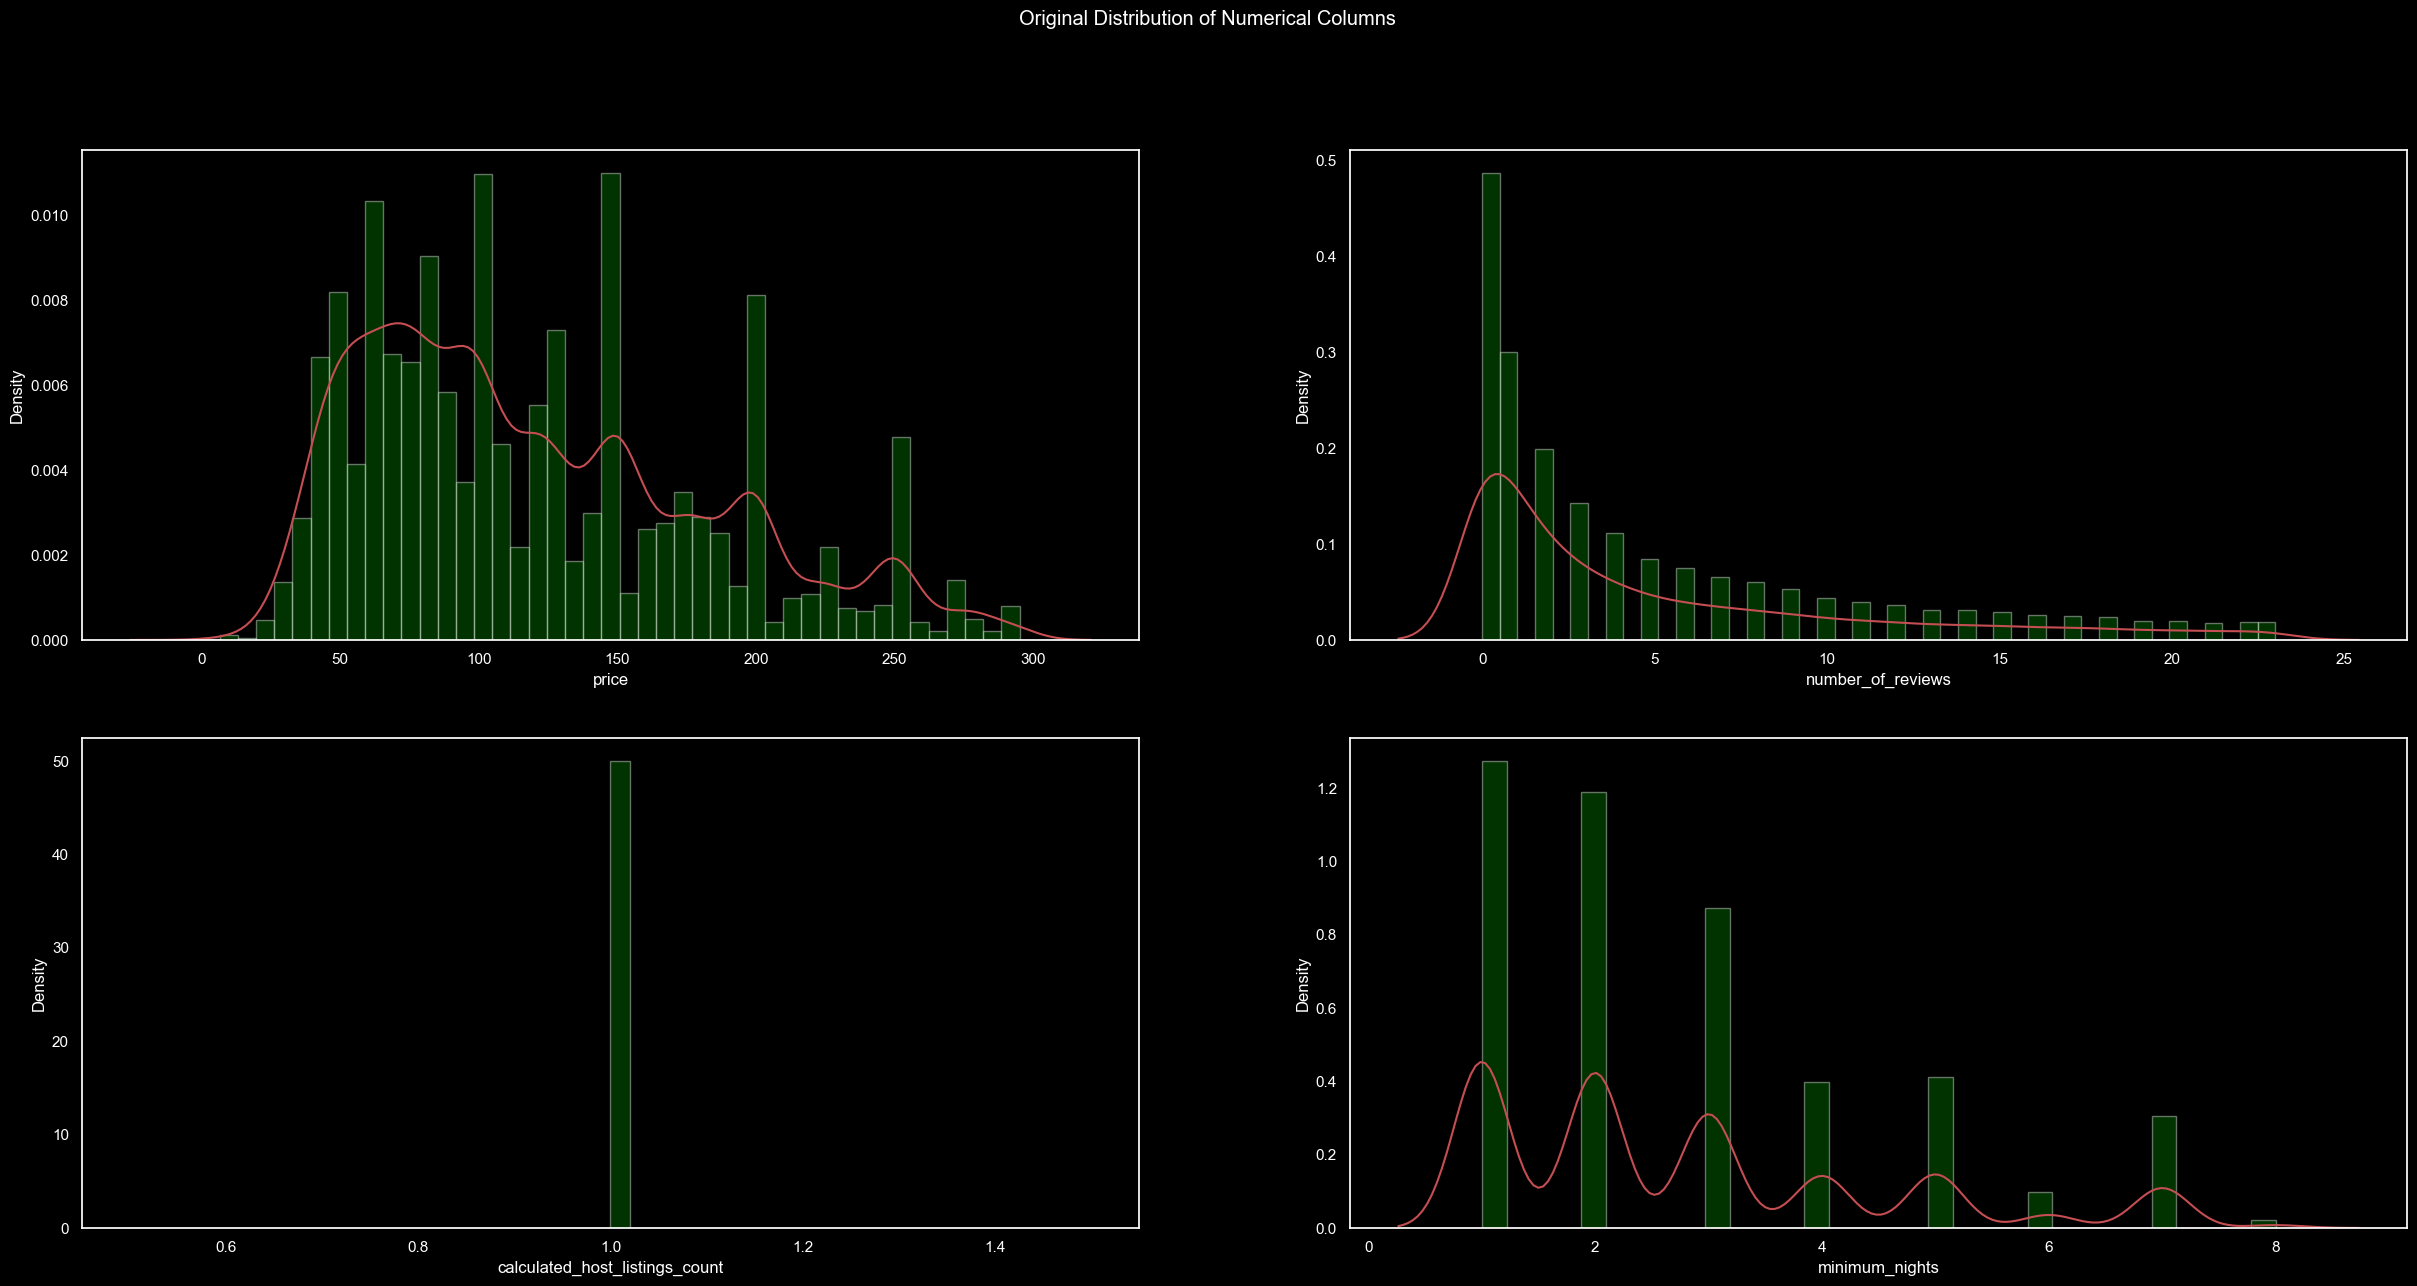

In [180]:
#setting subplots
fig, ax =plt.subplots(2,2,figsize=(30,14))
fig.suptitle('Original Distribution of Numerical Columns')
axis=0
j=0
for i in range(4):
  if i<2:
    sns.distplot(dfclean[num_col[i]],kde=True,color='green',kde_kws={'color':'r'},ax=ax[axis][i])
  elif i>=2:
    axis=1
    sns.distplot(dfclean[num_col[i]],kde=True,color='green',kde_kws={'color':'r'},ax=ax[axis][j])
    j=j+1
#show figure
fig.show()

In [182]:
#Applying central limit by defining sample size and number of samples
means = []
sample_size=70
number_of_samples=1500
np.random.seed(1)
#calculating mean of each smaples drawn
for column in num_col:
  x = [np.mean(np.random.choice(dfclean[column],sample_size)) for _i in range(number_of_samples)]
  means.append(x)

In [ ]:
Important Numeric Column after Applying Central Limit Theorem

C:\Users\Asus\AppData\Local\Temp\ipykernel_15304\1675787687.py:8: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\Asus\AppData\Local\Temp\ipykernel_15304\1675787687.py:8: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\Asus\AppData\Local\Temp\ipykernel_15304\1675787687.py:11: UserWarning:



`distplot` is a

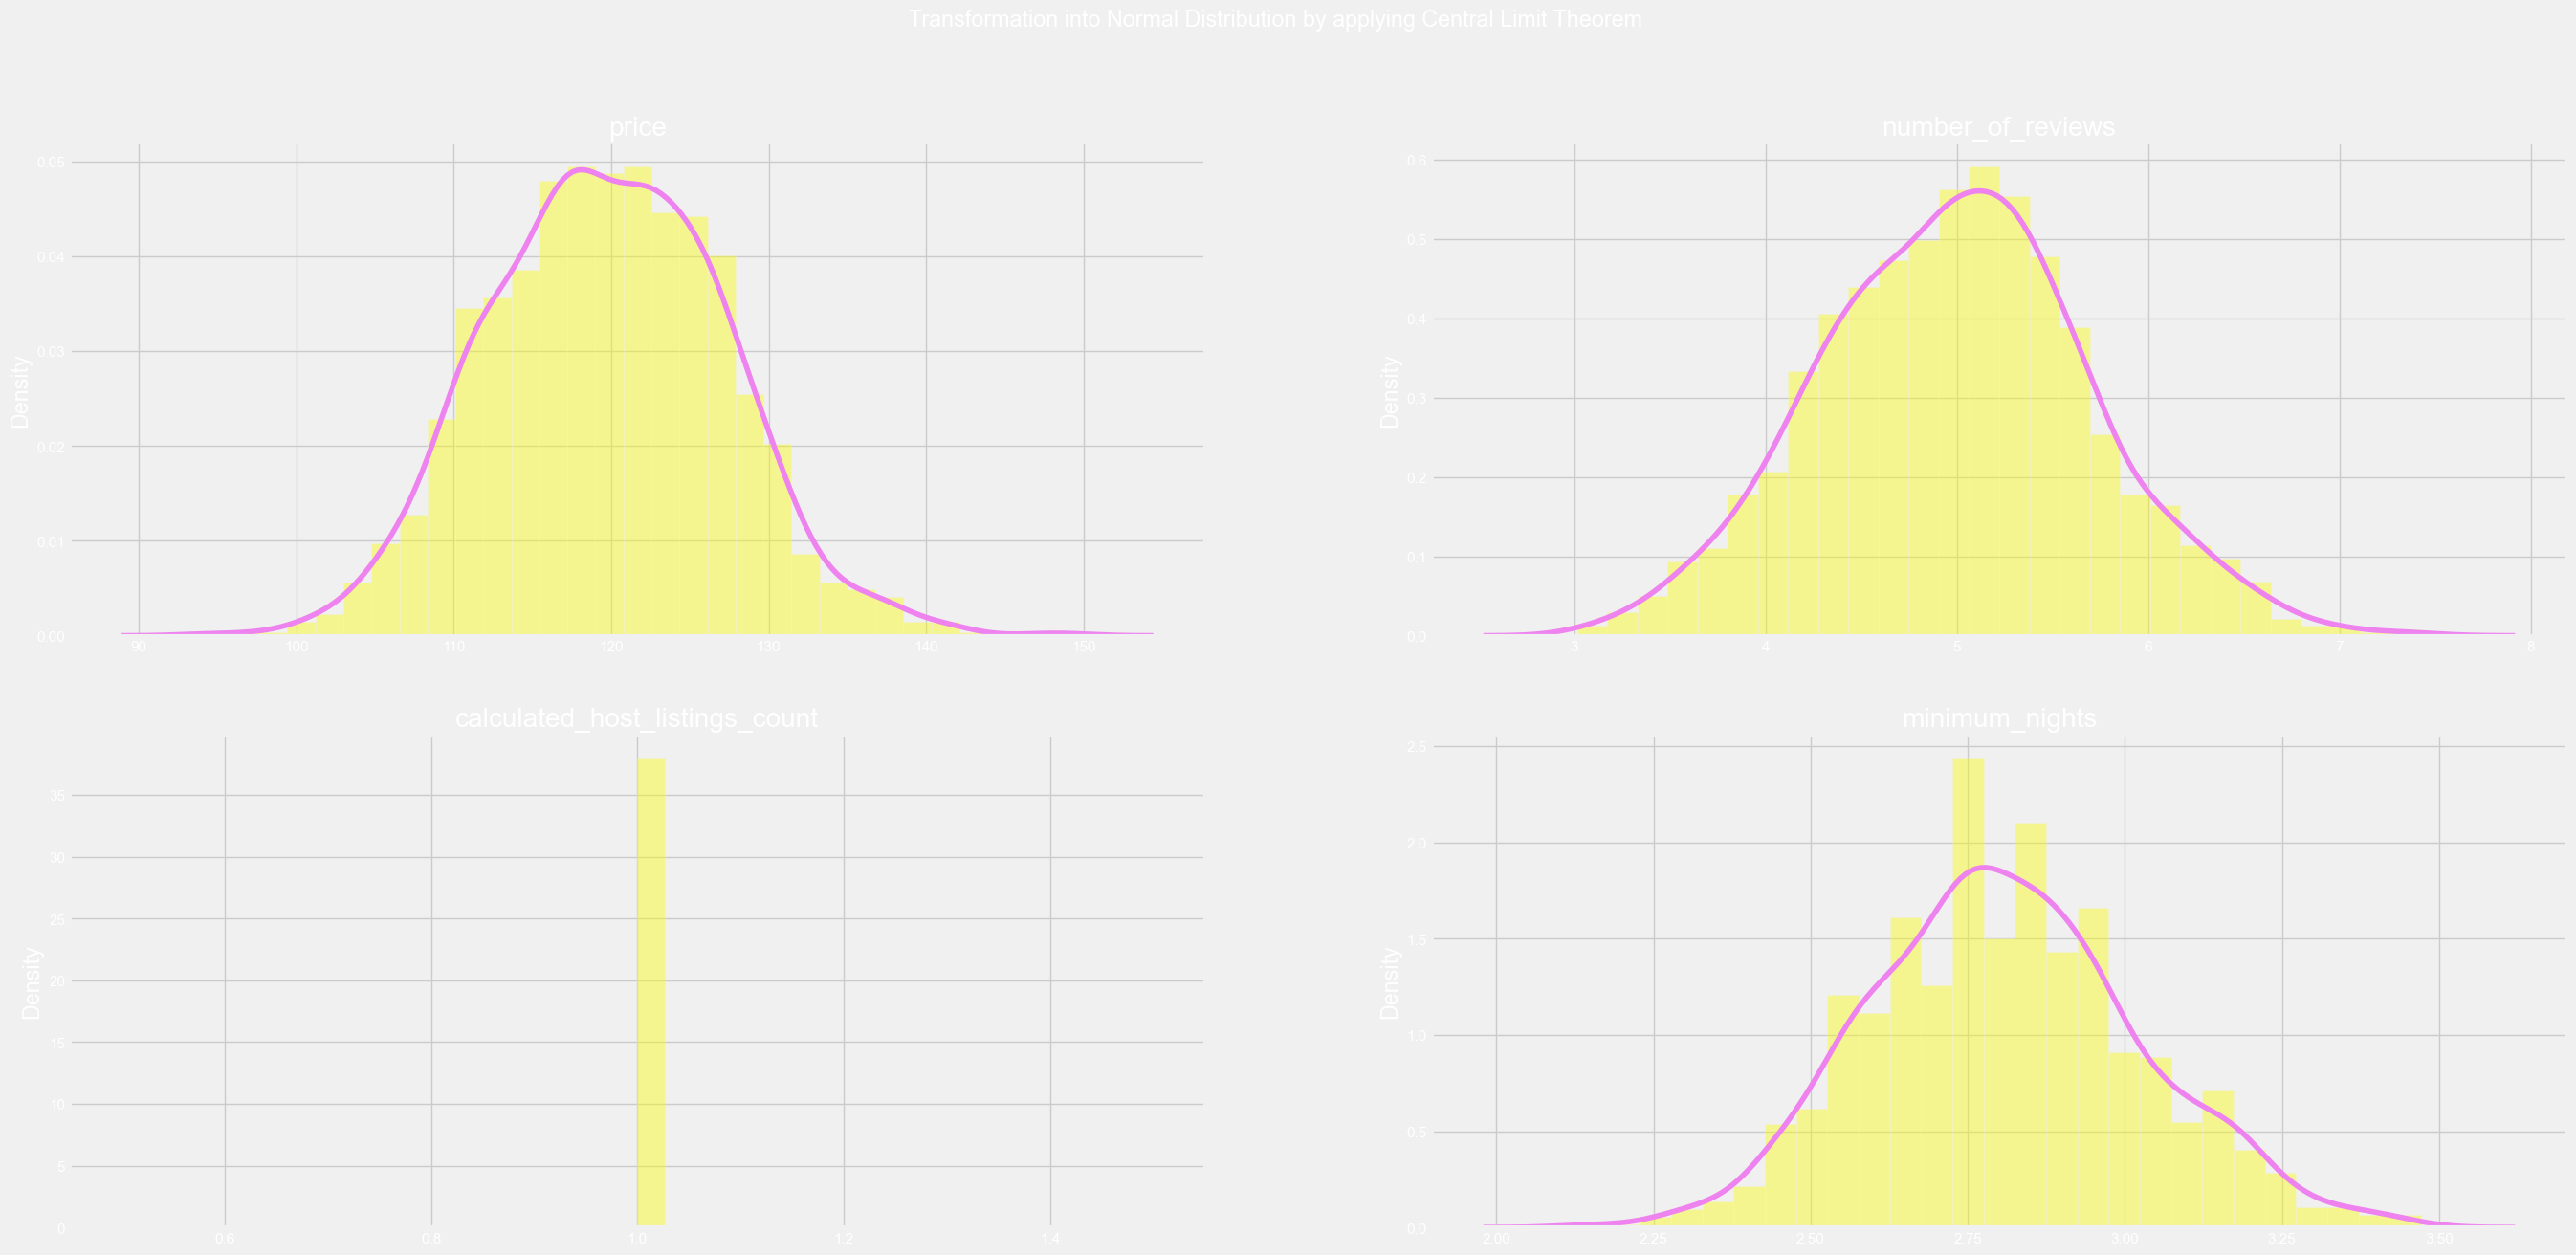

In [202]:
#setting subplots
fig, ax =plt.subplots(2,2,figsize=(30,14))
fig.suptitle('Transformation into Normal Distribution by applying Central Limit Theorem')
axis=0
j=0
for i in range(4):
  if i<2:
    sns.distplot(means[i],kde=True,color='yellow',kde_kws={'color':'violet'},ax=ax[axis][i]).set(title=num_col[i])
  elif i>=2:
    axis=1
    sns.distplot(means[i],kde=True,color='yellow',kde_kws={'color':'violet'},ax=ax[axis][j]).set(title=num_col[i])
    j=j+1
#show figure
fig.show()

In [197]:
#Visualise number of listings  in different locations with help of pie chart.
plt.style.use('fivethirtyeight')
plt.figure(figsize=(13,7))
plt.title=("neighbourhood group")
g=plt.pie(.neighbdfclearourhood_group.value_counts(),labels=airbnb.neighbourhood_group.value_counts().index,autopct='%1.1f%%',startangle=180)
plt.show()



SyntaxError: invalid syntax (1026239127.py, line 5)